In [6]:
# 10.1.3 연습문제 
#1. 
result1 = sp.stats.entropy([2/6, 4/6], base=2)
print(f'엔트로피 : {result1}')
# 2. 
result2 = sp.stats.entropy([30/40, 10/40], base=2)
print(f'엔트로피 : {result2}')

result3 = sp.stats.entropy([1, 0], base=2)
print(f'엔트로피 : {result3}')

엔트로피 : 0.9182958340544894
엔트로피 : 0.8112781244591328
엔트로피 : 0.0


In [4]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list(''.join([int(N*p[i])*c for i, c in enumerate('ABCD')]))
np.random.shuffle(doc0)
doc = ''.join(doc0)
doc

'BCBDCADAAAABAACBBBBACDDDBADAAAABBDADAAADABABAABAAAAAACAADBCBACBABACAAAABABBADDAABAAABAABAAACABADAABAAABBAAAADBAABAADBABBADDAAAAABADDAACCBAAAAABABDABCABAADCCBABCBDBDCCAAACCACAABACADBCCBAABCBBABDACAABAA'

# 가변길이 인코딩

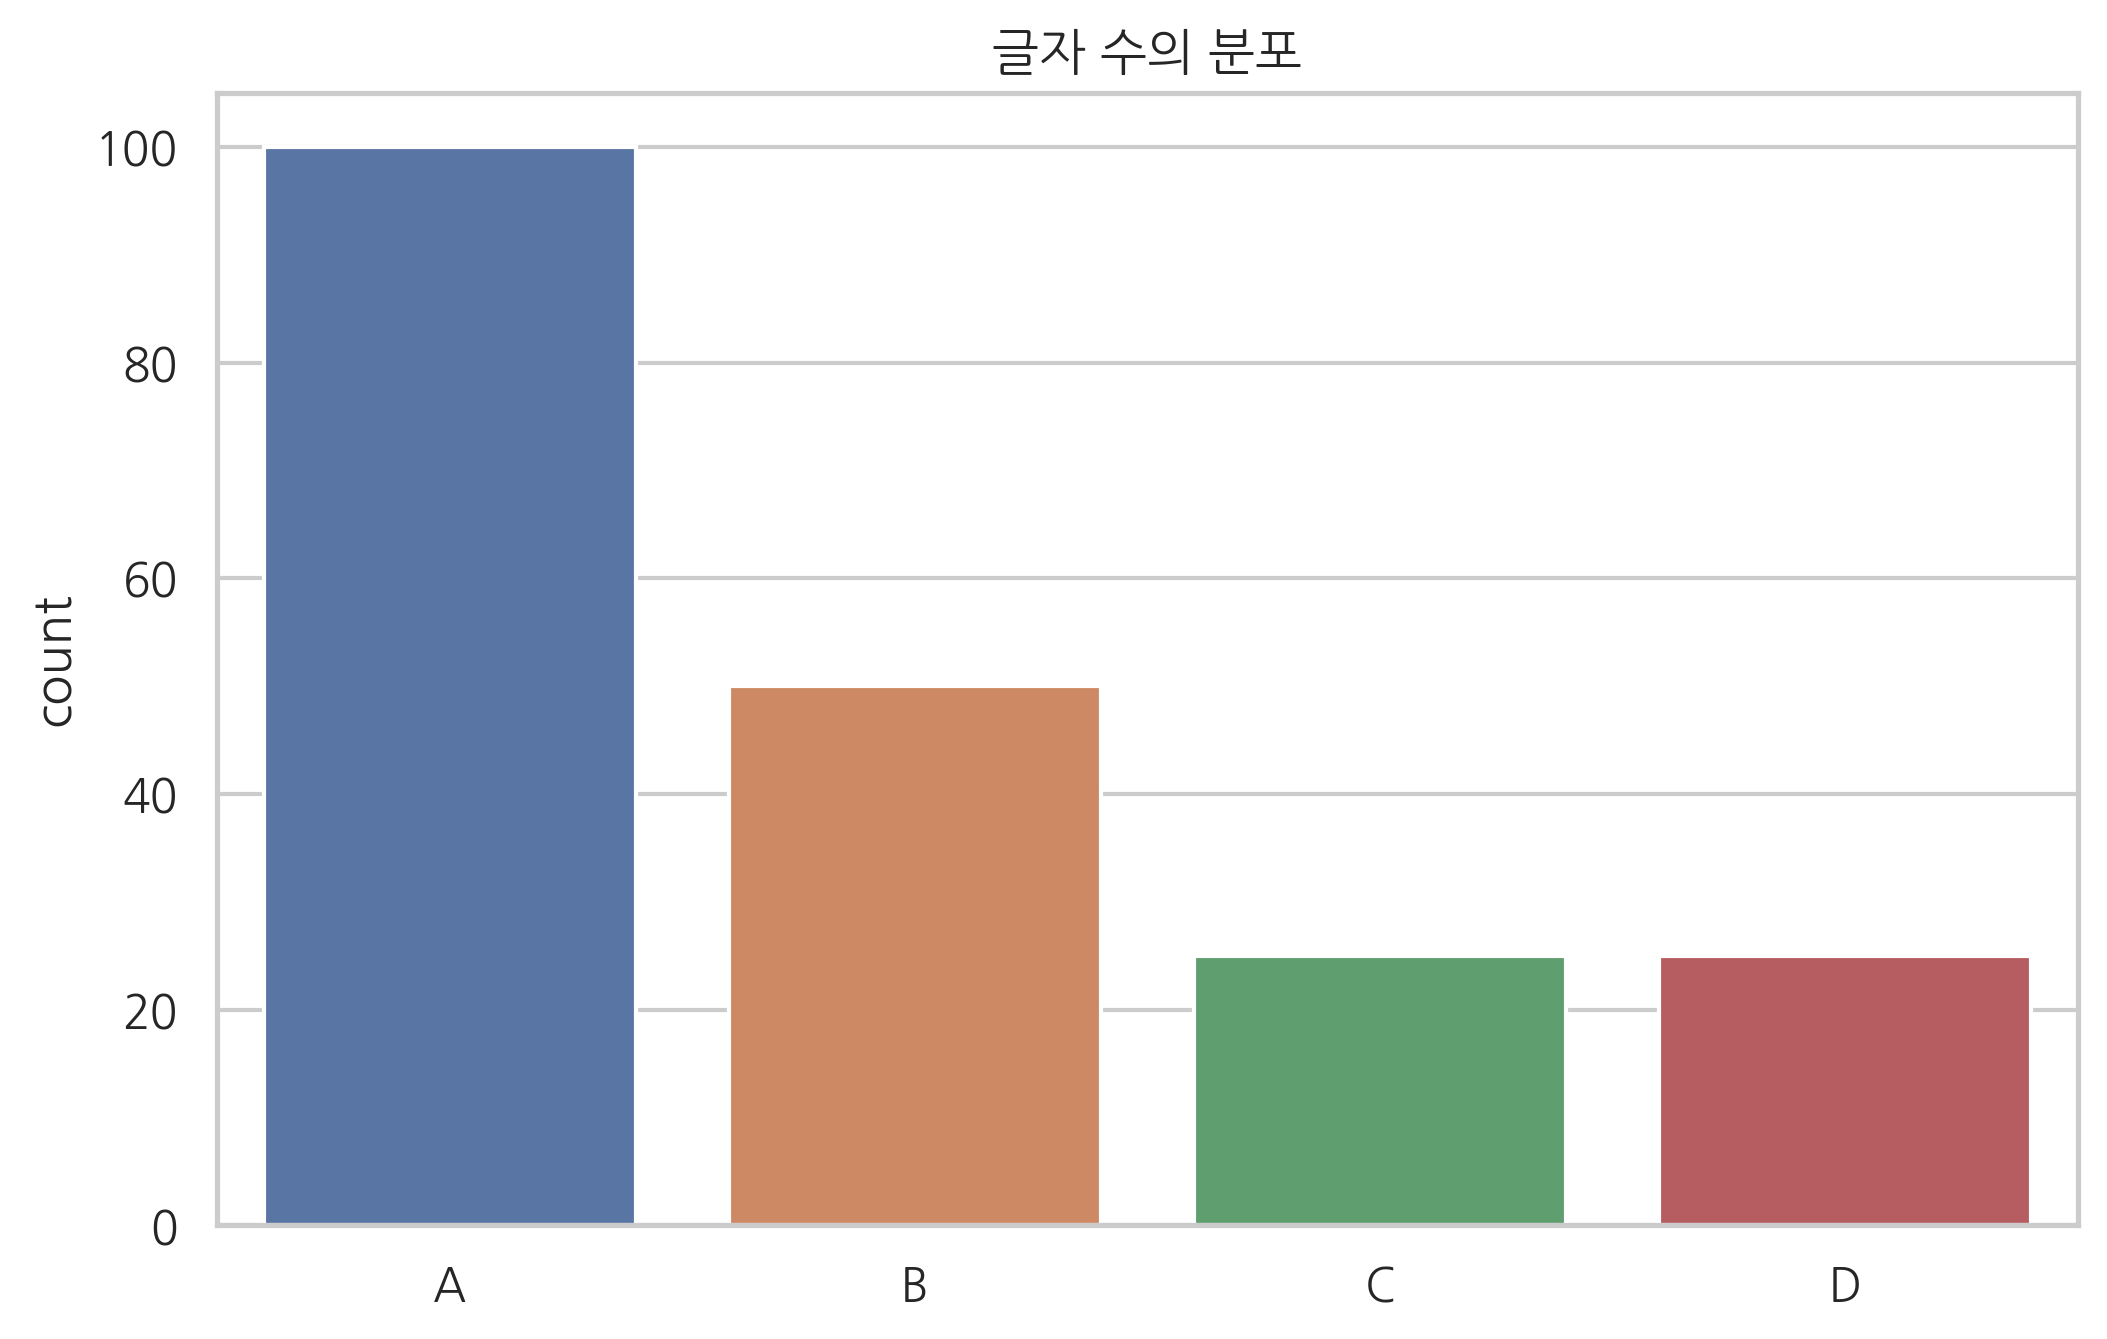

In [8]:
sns.countplot(list(doc), order='ABCD')
plt.title('글자 수의 분포')
plt.show()

In [24]:
# 가변길이 인코딩 결과
vl_encoder = {'A' : '0', 'B' : '10', 'C' : '110', 'D' : '111'}
vl_encoder_doc = ''.join([vl_encoder[c] for c in doc])
vl_encoder_doc


'10110101111100111000010001101010101001101111111111001110000101011101110001110100100010000000110001111011010011010010011000001001010011111100100001000100001100100111001000010100000111100010001111001010011111100000100111111001101101000000100101110101100100011111011010010110101111011111011000011011001100010011001111011011010001011010100101110110001000'

In [23]:
len(vl_encoder_doc)

350

In [30]:
# 10.1.4 연습문제 

N = 200
p = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]
doc0 = list(''.join([int(N*p[i])*c for i, c in enumerate('ABCDEFGH')]))
np.random.shuffle(doc0)
doc = ''.join(doc0)

encoder = {'A' : '0', 'B' : '10', 'C' : '110', 'D' : '1110', 'E' : '111100', 'F' : '111101', 'G' : '111110', 'H' : '111111'}

encoded = ''.join([encoder[i] for i in doc])
print(f'가변길이 인코딩 결과 : {encoded}')
print(f'글자 수 : {len(encoded)}')
ent = sp.stats.entropy([1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64], base=2)
print(f'엔트로피(평균정보량) : {ent}')


가변길이 인코딩 결과 : 01000100100000101111001000001100111110001001101010111101100111100010100011100000110000011101110101010111001001101111101100111101110111011011001100001100101001101010000111110001111010110101000100010011000100111001100011100101011100001010100010010110100000101100100111111011100101010101001100011011001100011000110001010101011110010111001100001000011001111110100111111000100001110011001010111000010
글자 수 : 395
엔트로피(평균정보량) : 2.0


# 지니 불순도 

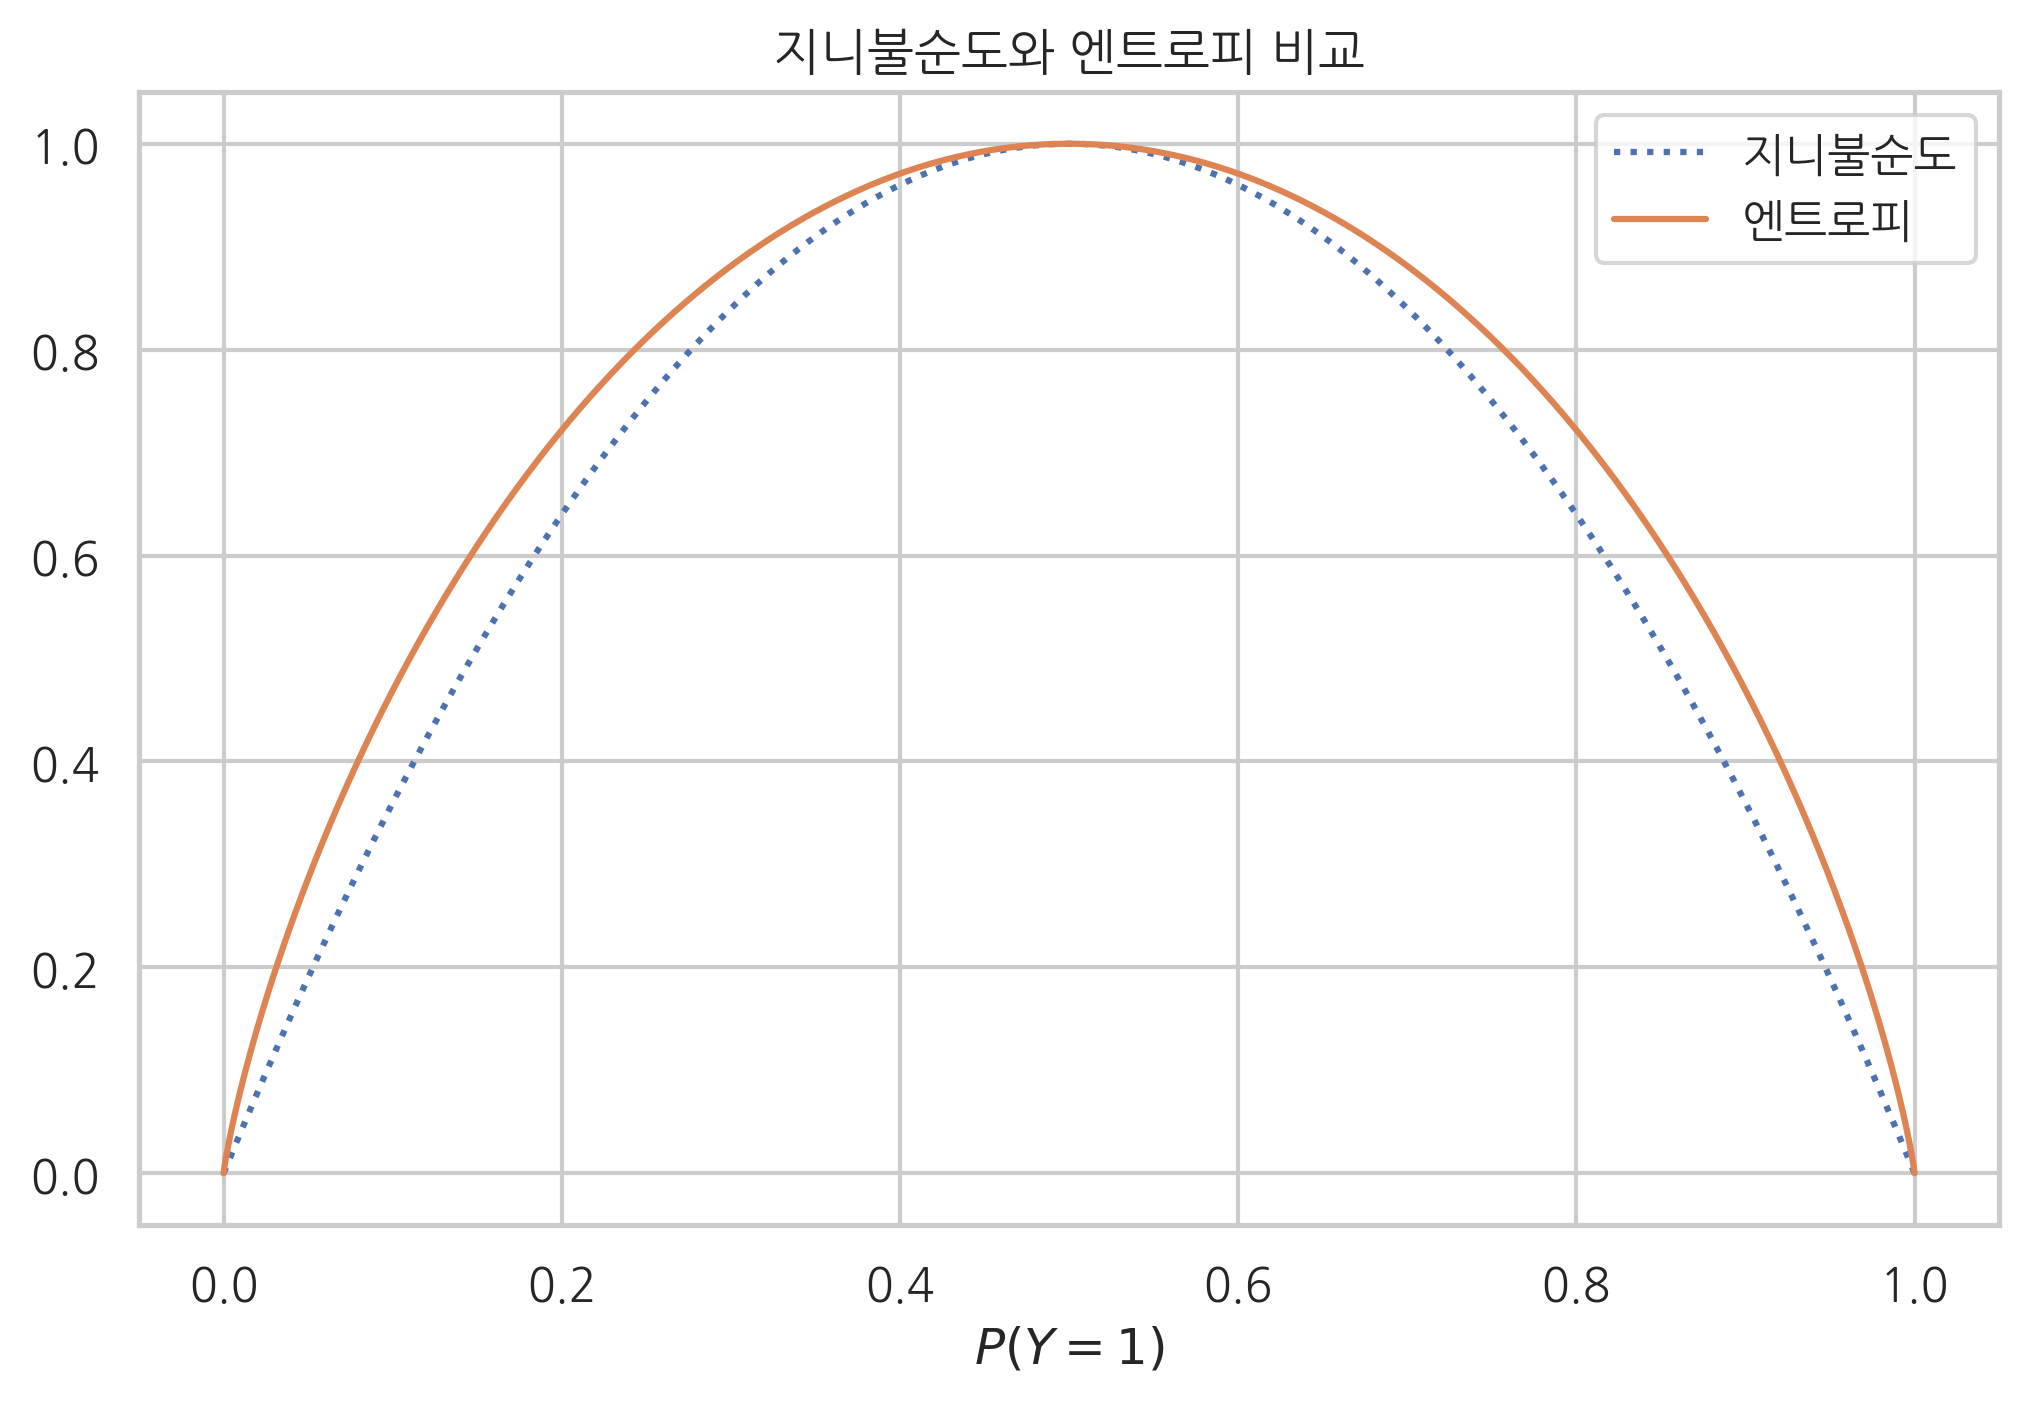

In [42]:
def gini_impurity(p) : 
    return 2*(p*(1-p) + (1-p)*p)
pp = np.linspace(0, 1, 10000)
gini_impurity = gini_impurity(pp)


def entropy(p) : 
    if p == 0 or p == 1 : 
        return 0
    else : 
        return (-p*np.log2(p)-(1-p)*np.log2(1-p))
entropy = [entropy(p) for p in pp]

plt.plot(pp, gini_impurity, label='지니불순도', ls=':')
plt.plot(pp, entropy, label='엔트로피')
plt.title('지니불순도와 엔트로피 비교')
plt.legend()
plt.xlabel('$P(Y=1)$')
plt.show()

In [52]:
-0.4*np.log2(0.4)-0.6*np.log2(0.6)

0.9709505944546686

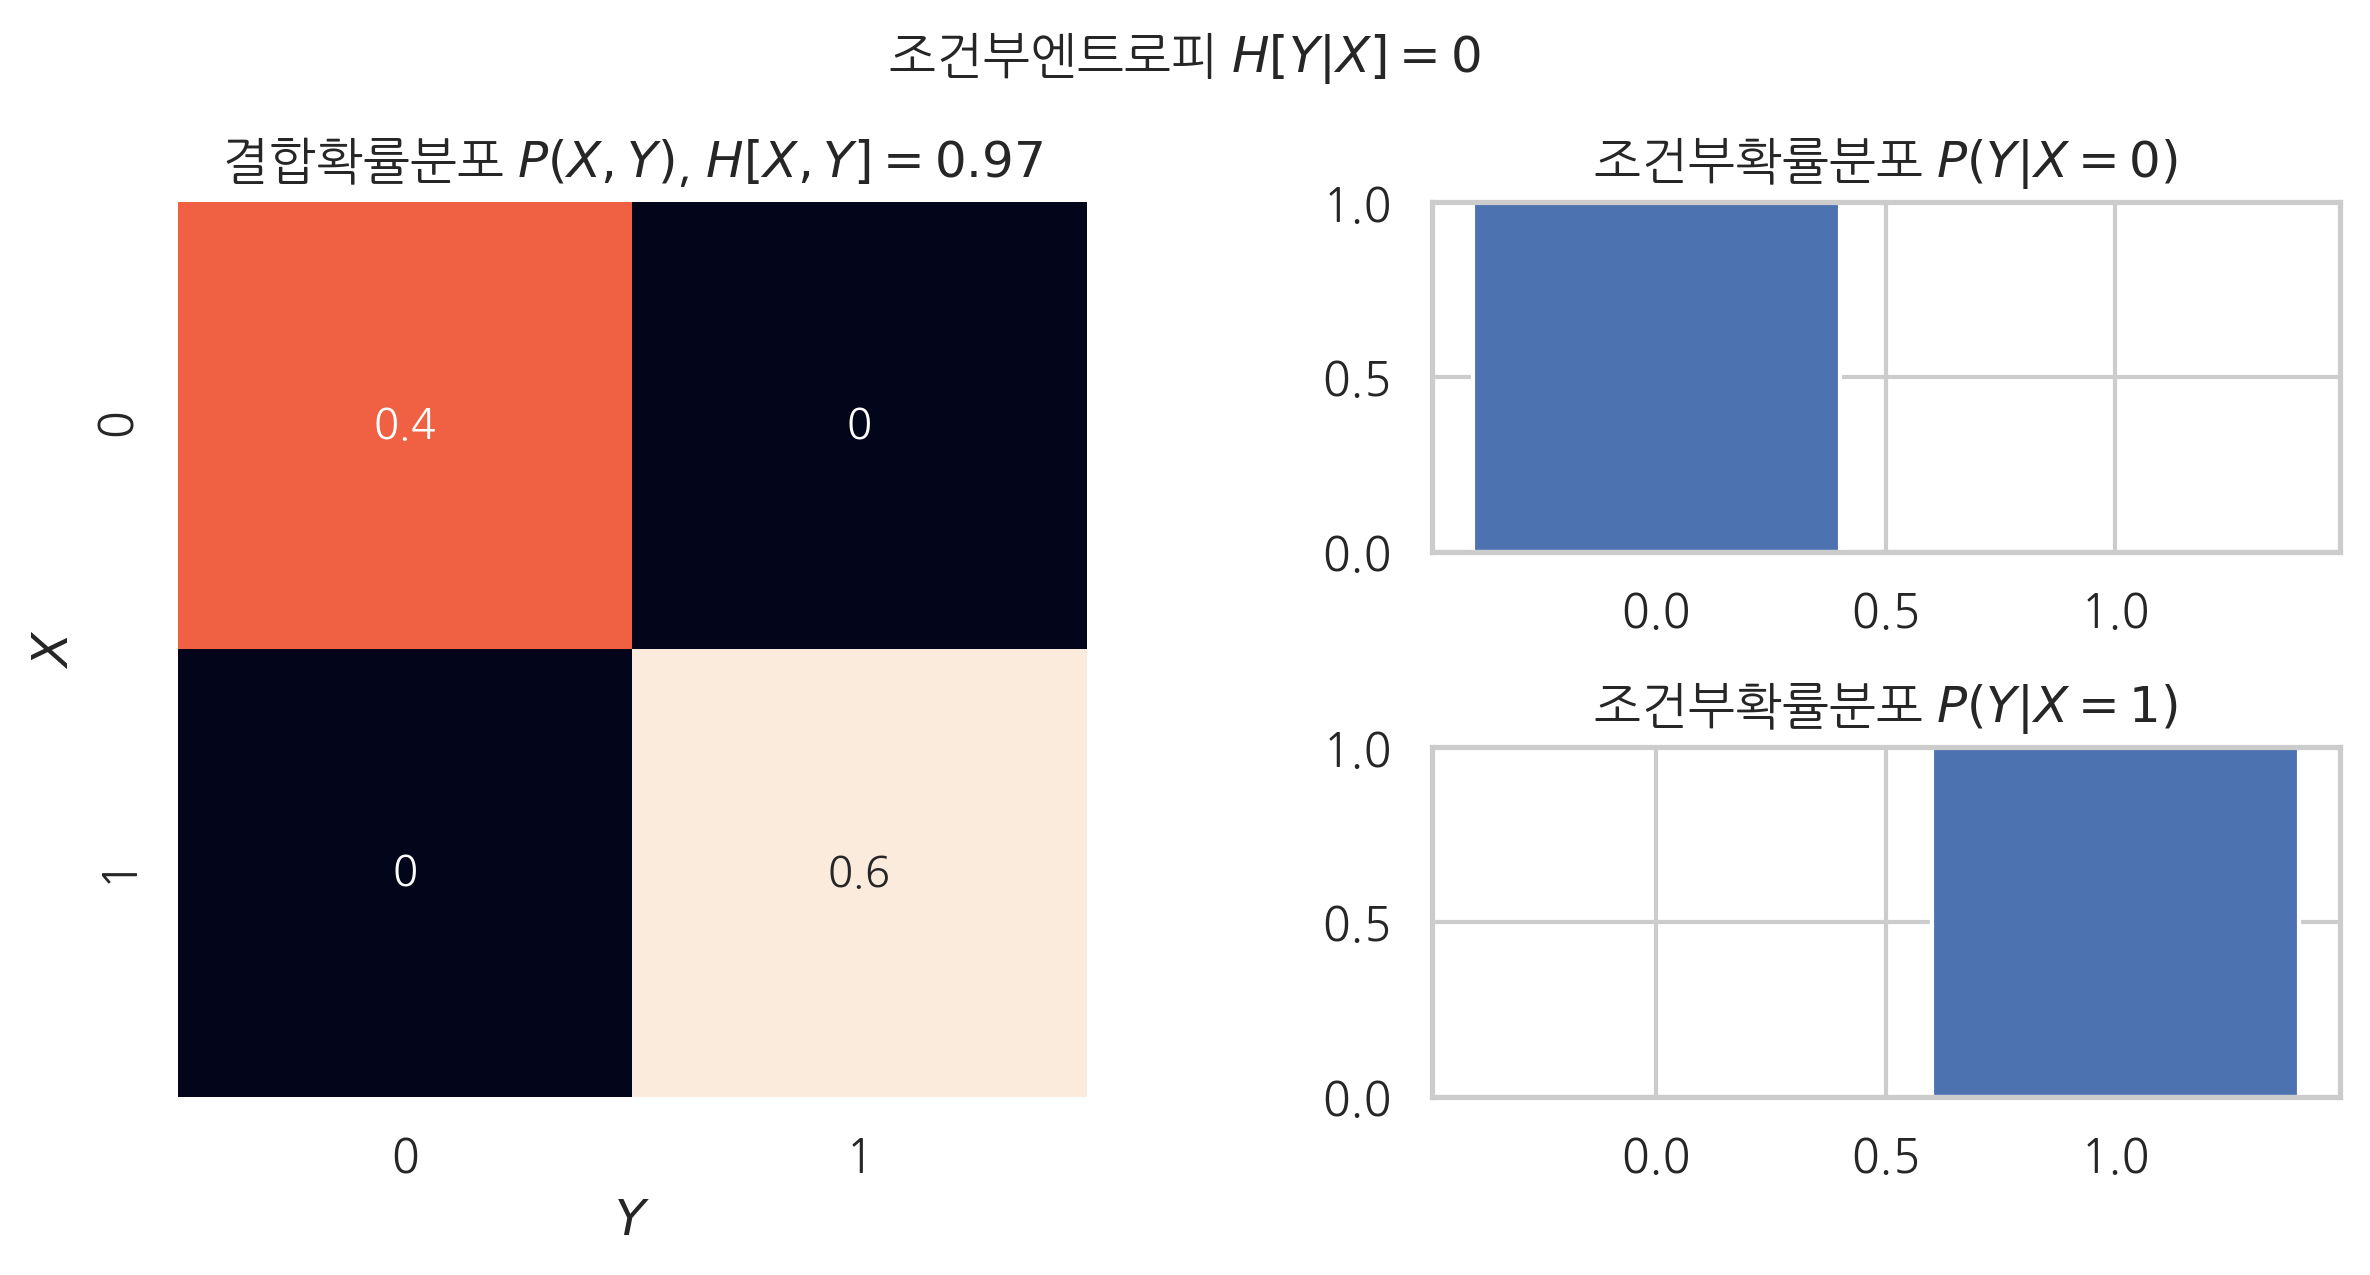

In [66]:
plt.figure(figsize=(8,4))

plt.subplot(121)
pxy = [[0.4, 0],[0,0.6]]
sns.heatmap(pxy, annot=True,cbar=False)
plt.xlabel('$Y$')
plt.ylabel('$X$')
plt.title('결합확률분포 $P(X,Y)$, $H[X,Y] = 0.97$')

plt.subplot(222)
plt.bar([0,1],[1,0])
plt.ylim(0,1)
plt.title('조건부확률분포 $P(Y|X=0)$')

plt.subplot(224)
plt.bar([0,1],[0,1])
plt.ylim(0,1)
plt.title('조건부확률분포 $P(Y|X=1)$')

plt.tight_layout(w_pad=5)
plt.suptitle('조건부엔트로피 $H[Y|X] = 0$', y=1.05)
plt.show()

In [68]:
result = -(1/3)*np.log2(1/3)-(2/3)*np.log2(2/3)
print(result)

print(sp.stats.entropy([1/3, 2/3], base=2))

0.9182958340544896
0.9182958340544894


In [70]:
np.round((1/3)*0.92 + (2/3)*0.92, 2)

0.92

In [71]:
-(1/9)*np.log2(1/9)-(2/9)*np.log2(2/9)-(2/9)*np.log2(2/9)-(4/9)*np.log2(4/9)

1.8365916681089791

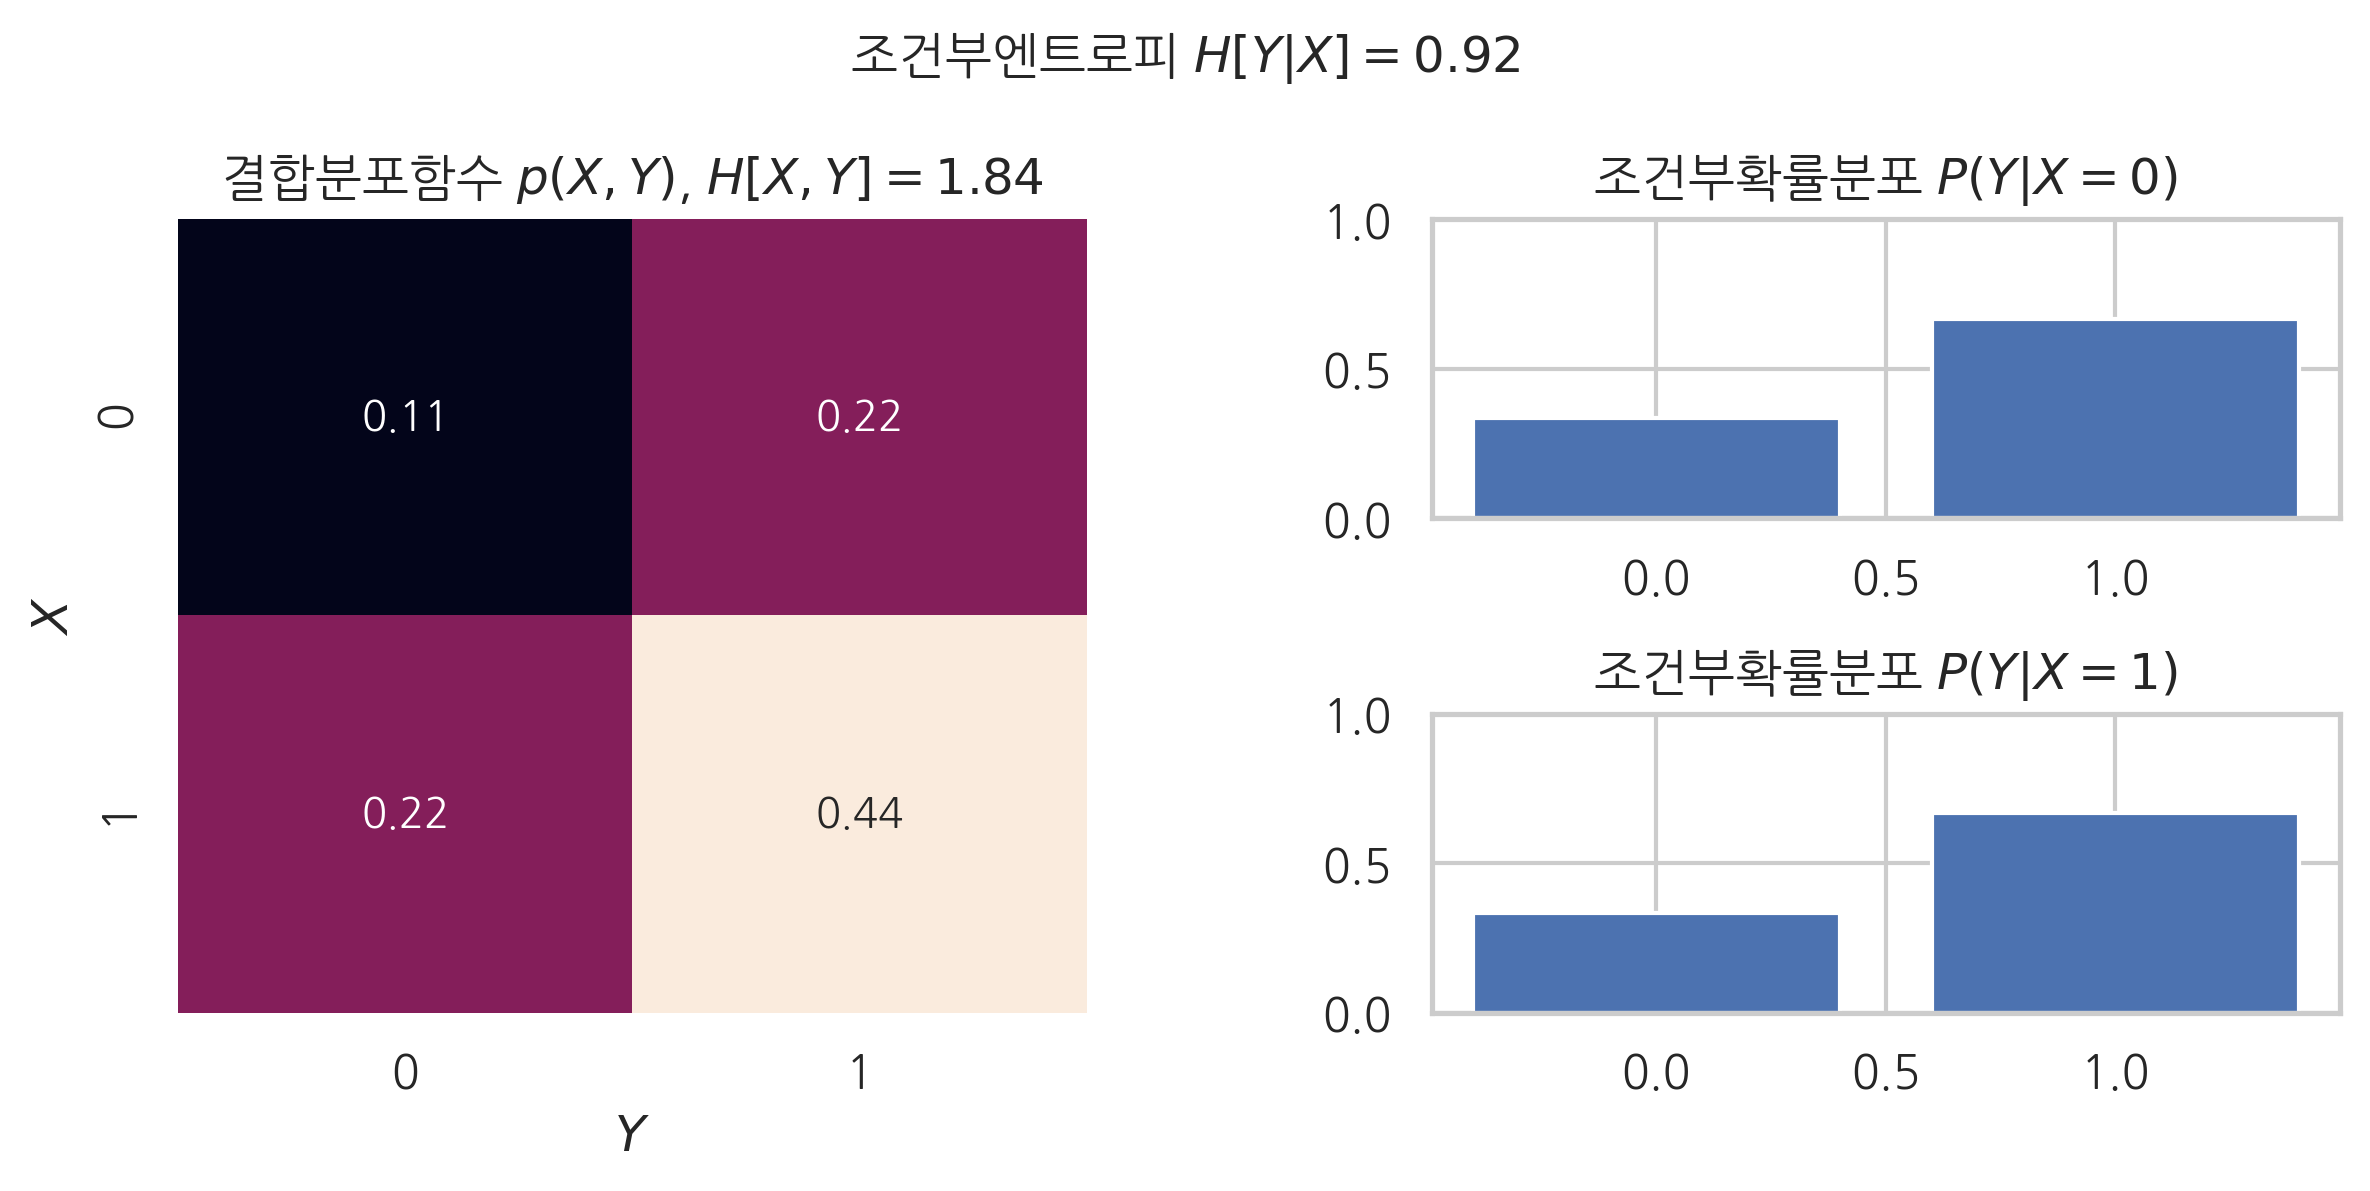

In [82]:
plt.figure(figsize=(8,4))

plt.subplot(121)
pxy = [[1/9, 2/9],[2/9,4/9]]
sns.heatmap(pxy, annot=True, cbar=False)
plt.xlabel('$Y$')
plt.ylabel('$X$')
plt.title('결합분포함수 $p(X,Y)$, $H[X,Y]=1.84$')

plt.subplot(222)
plt.bar([0,1],[1/3, 2/3])
plt.title('조건부확률분포 $P(Y|X=0)$')
plt.ylim(0,1)

plt.subplot(224)
plt.bar([0,1],[1/3, 2/3])
plt.title('조건부확률분포 $P(Y|X=1)$')
plt.ylim(0,1)

plt.suptitle('조건부엔트로피 $H[Y|X]=0.92$')
plt.tight_layout(w_pad=5)
plt.show()

In [93]:
a = (-3/8*np.log2(3/8)-(1/8)*np.log2(1/8))*1/2

In [99]:
r = (1/2)*(-3/4*np.log2(3/4)-1/4*np.log2(1/4))
2*r

0.8112781244591328

In [101]:
np.round((3/4)*(-1/3*np.log2(1/3)-(2/3)*np.log2(2/3)),2)

0.69

In [243]:
# 조건부엔트로피 사용한 붓꽃분류문제 

from sklearn.datasets import load_iris

data = load_iris().data
df = pd.DataFrame(data, columns=load_iris().feature_names)
df['species'] = load_iris().target
df_1 = df[df['species'] == 1]
df_2 = df[df['species'] == 2]
df= pd.concat([df_1, df_2]).reset_index(drop=True)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


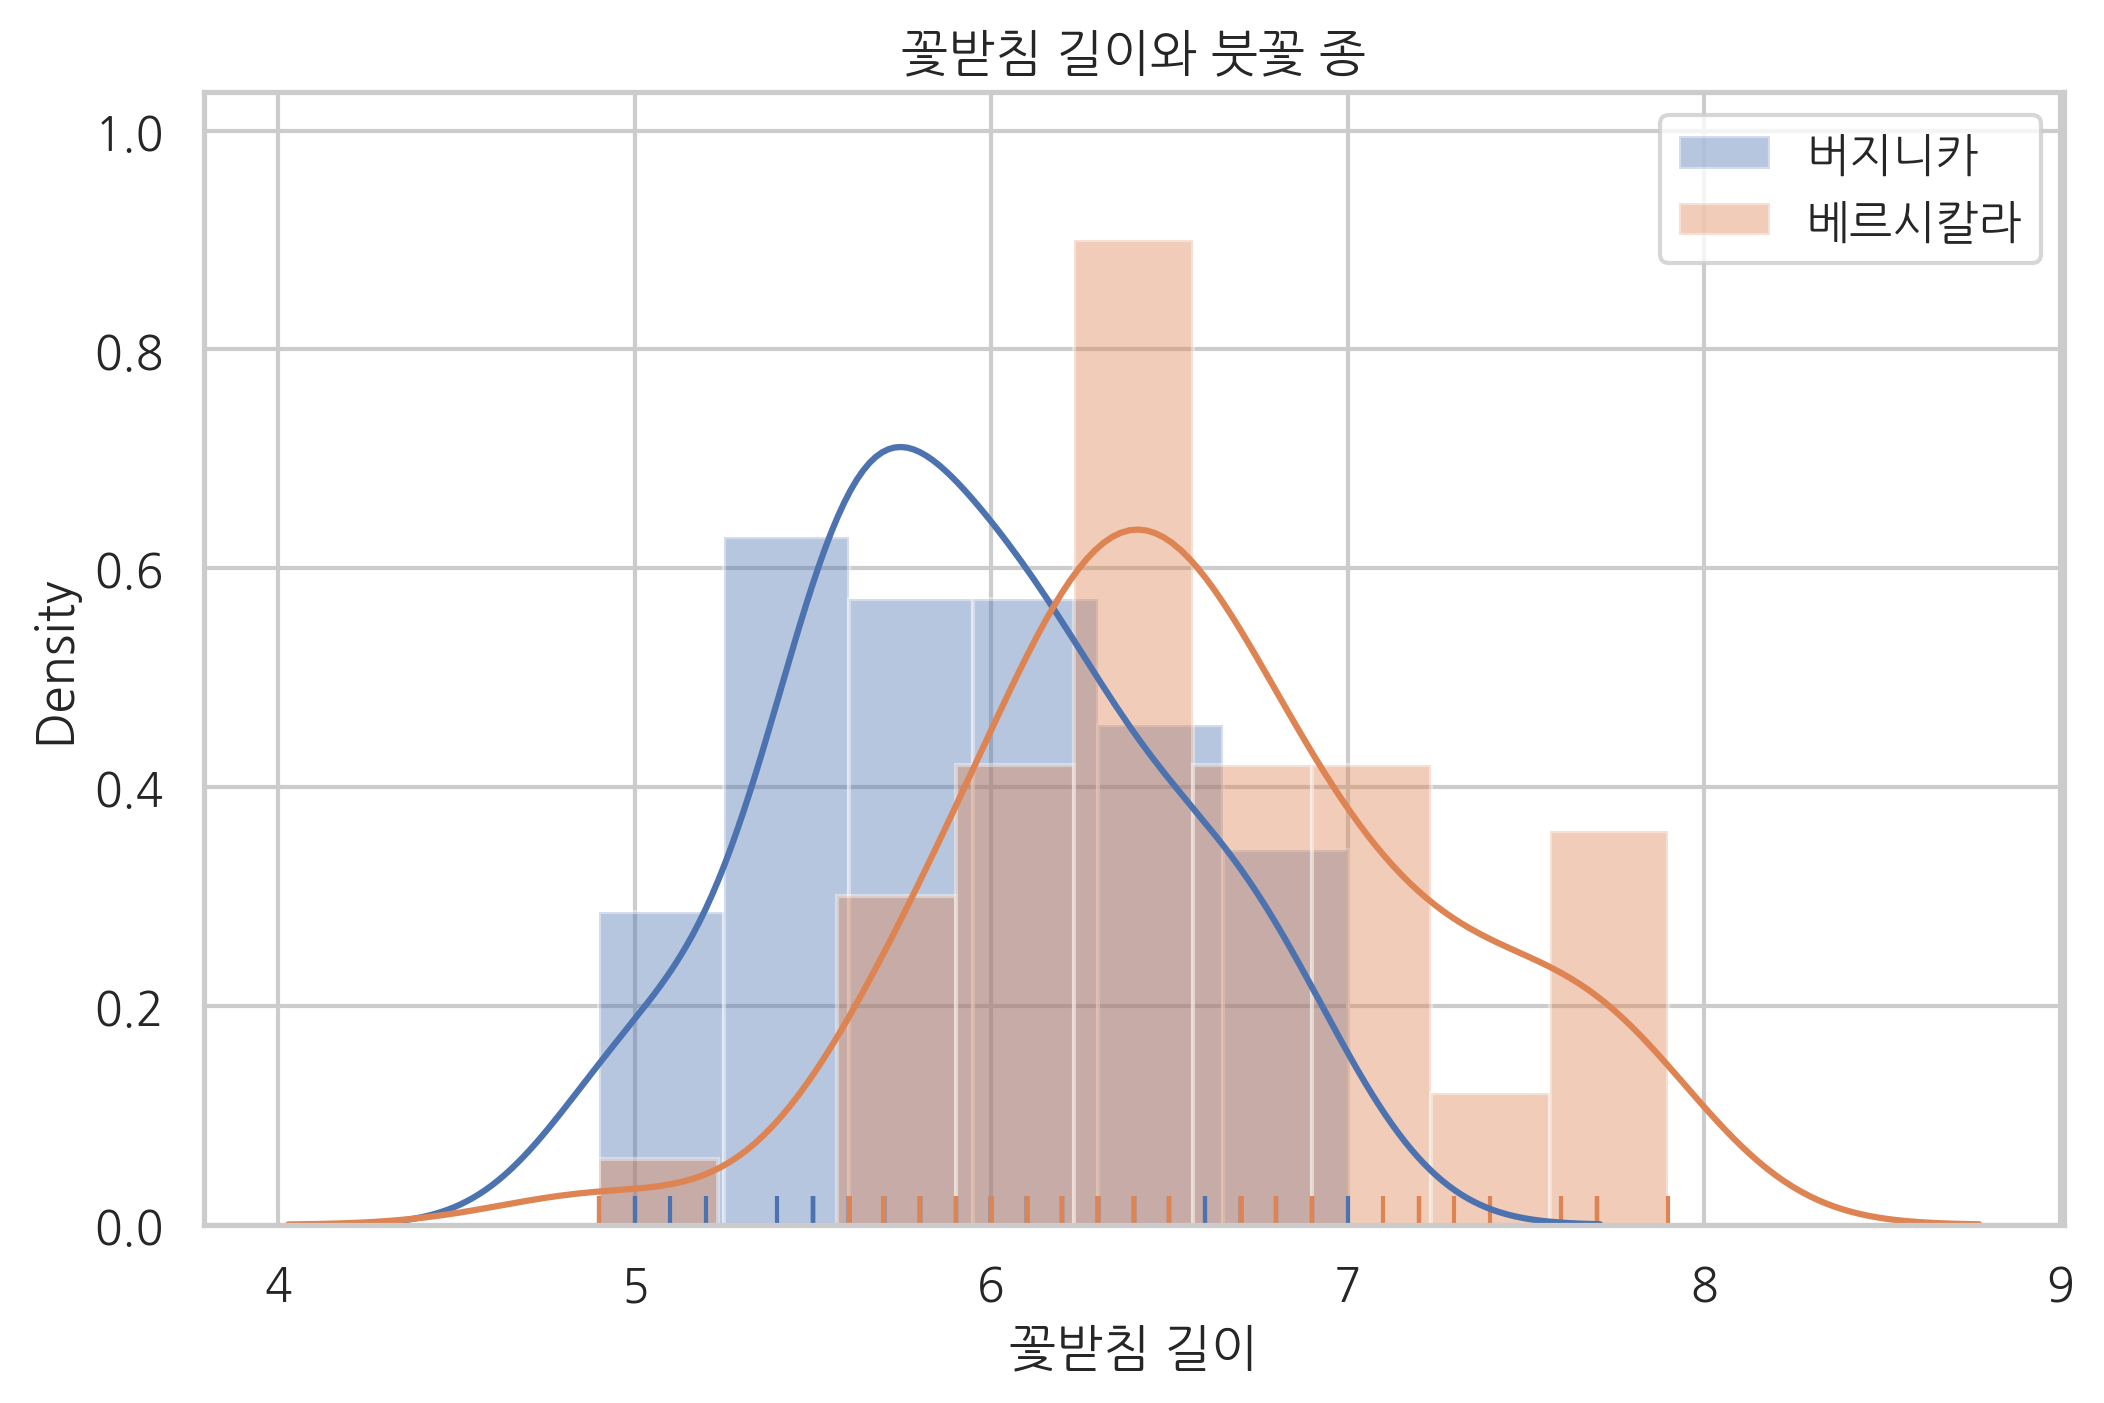

In [244]:
sns.distplot(df[df['species']==1]['sepal length (cm)'], hist=True, rug=True, label='버지니카')
sns.distplot(df[df['species']==2]['sepal length (cm)'],  hist=True, rug=True, label='베르시칼라')
plt.legend()
plt.xlabel('꽃받침 길이')
plt.title('꽃받침 길이와 붓꽃 종')
plt.show()

In [245]:
df['X1'] = df['sepal length (cm)'] > 6
pivot = df.groupby(['X1', 'species']).size().unstack().fillna(0)
pivot # X1, species 확률변수의 결합확률분포 

species,1,2
X1,,
False,30,9
True,20,41


In [241]:
def cond_entropy(v) : 
    v1 = v[0, :]/np.sum(v[0, :])
    v2 = v[1, :]/np.sum(v[1, :])

    ent1 = sp.stats.entropy(v1, base=2)
    ent2 = sp.stats.entropy(v2, base=2)

    H = np.sum(v, axis=1)@np.array([ent1, ent2])/np.sum(v)
    return H

cond_entropy(pivot.values)

0.860714271586387

In [248]:
# 6.5를 넘는가 유무
df['X2'] = df['sepal length (cm)'] > 6.5
df2 = df.groupby(['X2', 'species']).size().unstack().fillna(0)

cond_entropy(df2.values)

0.9306576387006182

# 조건부 엔트로피가 6cm 기준일 때 더 작으므로, 6cm가 6.5 cm 보다 종 구분(예측)에 더 적합한 기준이다. 

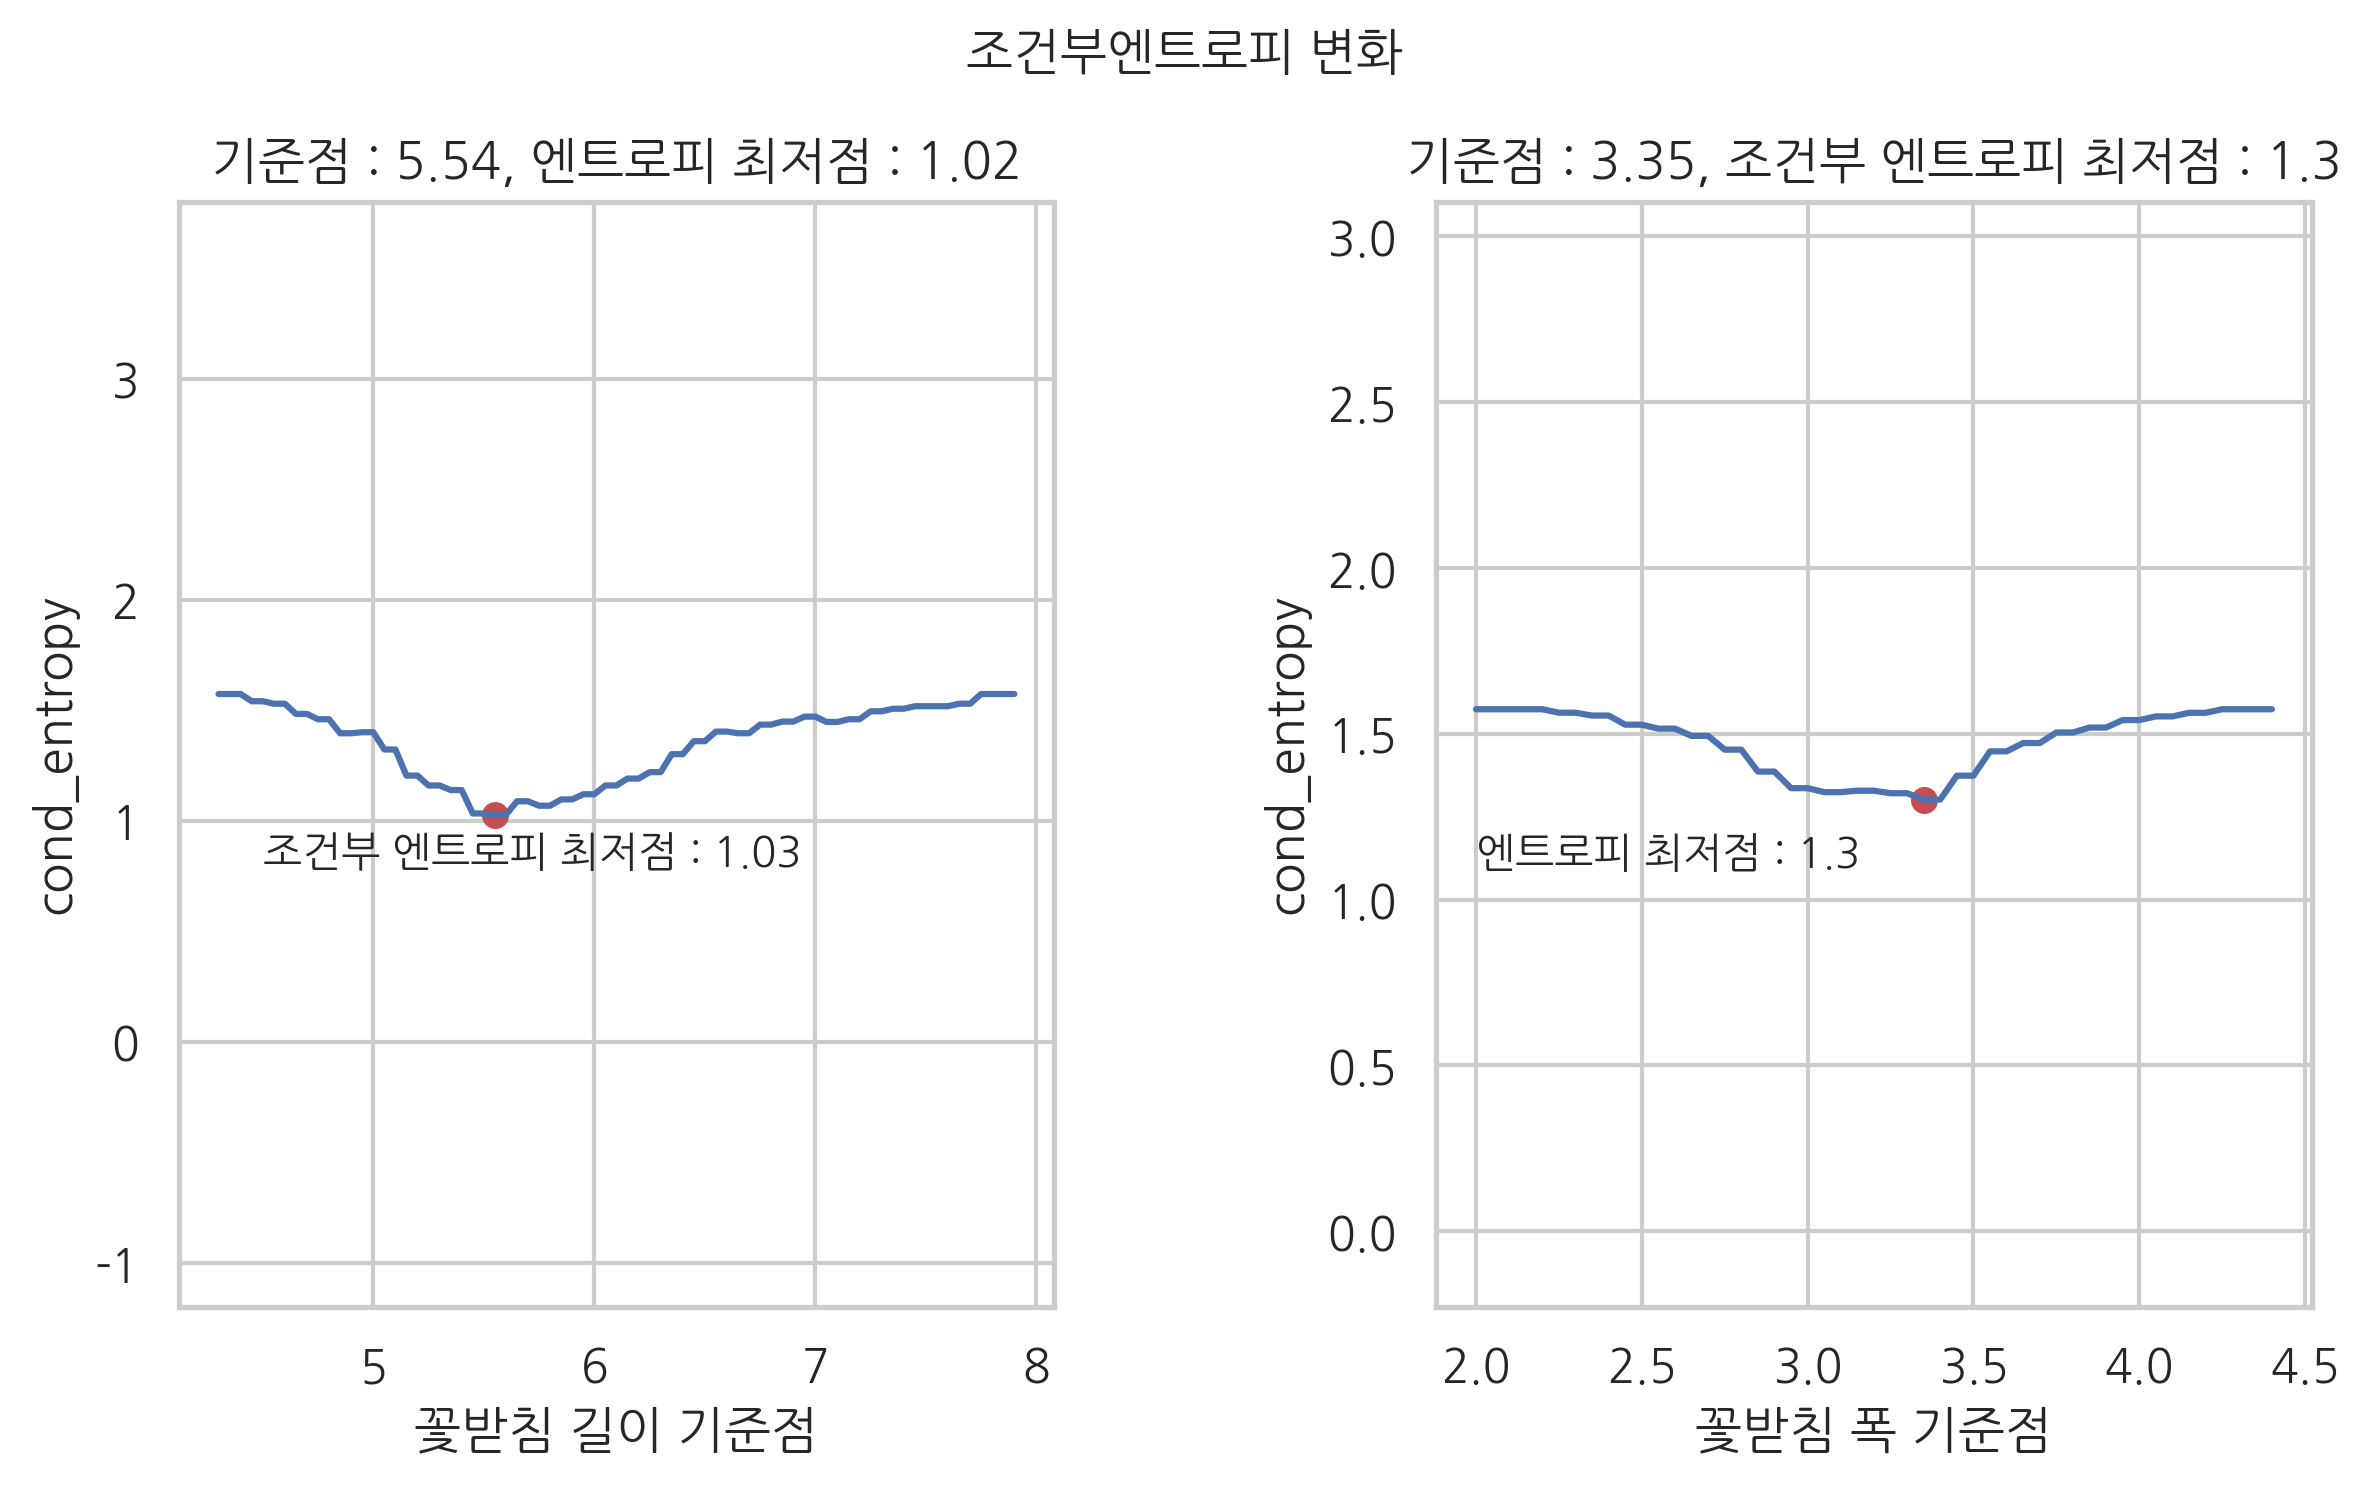

In [335]:
# 10.2.1 연습문제 
# 꽃받침 길이
from sklearn.datasets import load_iris
iris = load_iris().data
df = pd.DataFrame(iris, columns=load_iris().feature_names)
df['species'] = load_iris().target
sl = df['sepal length (cm)'].values
xx = np.arange(np.min(sl), np.max(sl)+0.05, step=0.05)

entropy_list = []
for i, x in enumerate(xx) : 
    a = 'X'+str(i)
    df[a] = df['sepal length (cm)'] > x
    v = df.groupby([a, 'species']).size().unstack().fillna(0)
    entropy_list.append(cond_entropy(v.values))

plt.subplot(121)
plt.plot(xx, entropy_list)
plt.title(f'기준점 : 5.54, 엔트로피 최저점 : 1.02')
plt.ylabel('cond_entropy')
plt.xlabel('꽃받침 길이 기준점')
m = np.min(entropy_list)
plt.scatter(xx[entropy_list.index(np.min(entropy_list))], m, 30, 'r')
plt.text(4.5, 0.8, f'조건부 엔트로피 최저점 : {np.round(m,2)}')
plt.axis('equal')


# 꽃받침 폭
sl2 = df['sepal width (cm)'].values
xx2 = np.arange(np.min(sl2), np.max(sl2)+0.05, step=0.05)

entropy_list2 = []
for i, x in enumerate(xx2) : 
    a = 'X'+str(i)
    df[a] = df['sepal width (cm)'] > x
    v = df.groupby([a, 'species']).size().unstack().fillna(0)
    entropy_list2.append(cond_entropy(v.values))

plt.subplot(122)
plt.plot(xx2, entropy_list2)
plt.axis('equal')
plt.xlabel('꽃받침 폭 기준점')
plt.ylabel('cond_entropy')
plt.title('기준점 : {}, 조건부 엔트로피 최저점 : {}'.format(np.round(xx2[entropy_list2.index(np.min(entropy_list2))],2), np.round(np.min(entropy_list2),2))) 
plt.scatter(xx2[entropy_list2.index(np.min(entropy_list2))], np.min(entropy_list2), 30, 'r')
plt.text(2, np.min(entropy_list2)-0.2, f'엔트로피 최저점 : {np.min(np.round(entropy_list2,2))}')


plt.suptitle('조건부엔트로피 변화')
plt.tight_layout(w_pad=5)
plt.show()

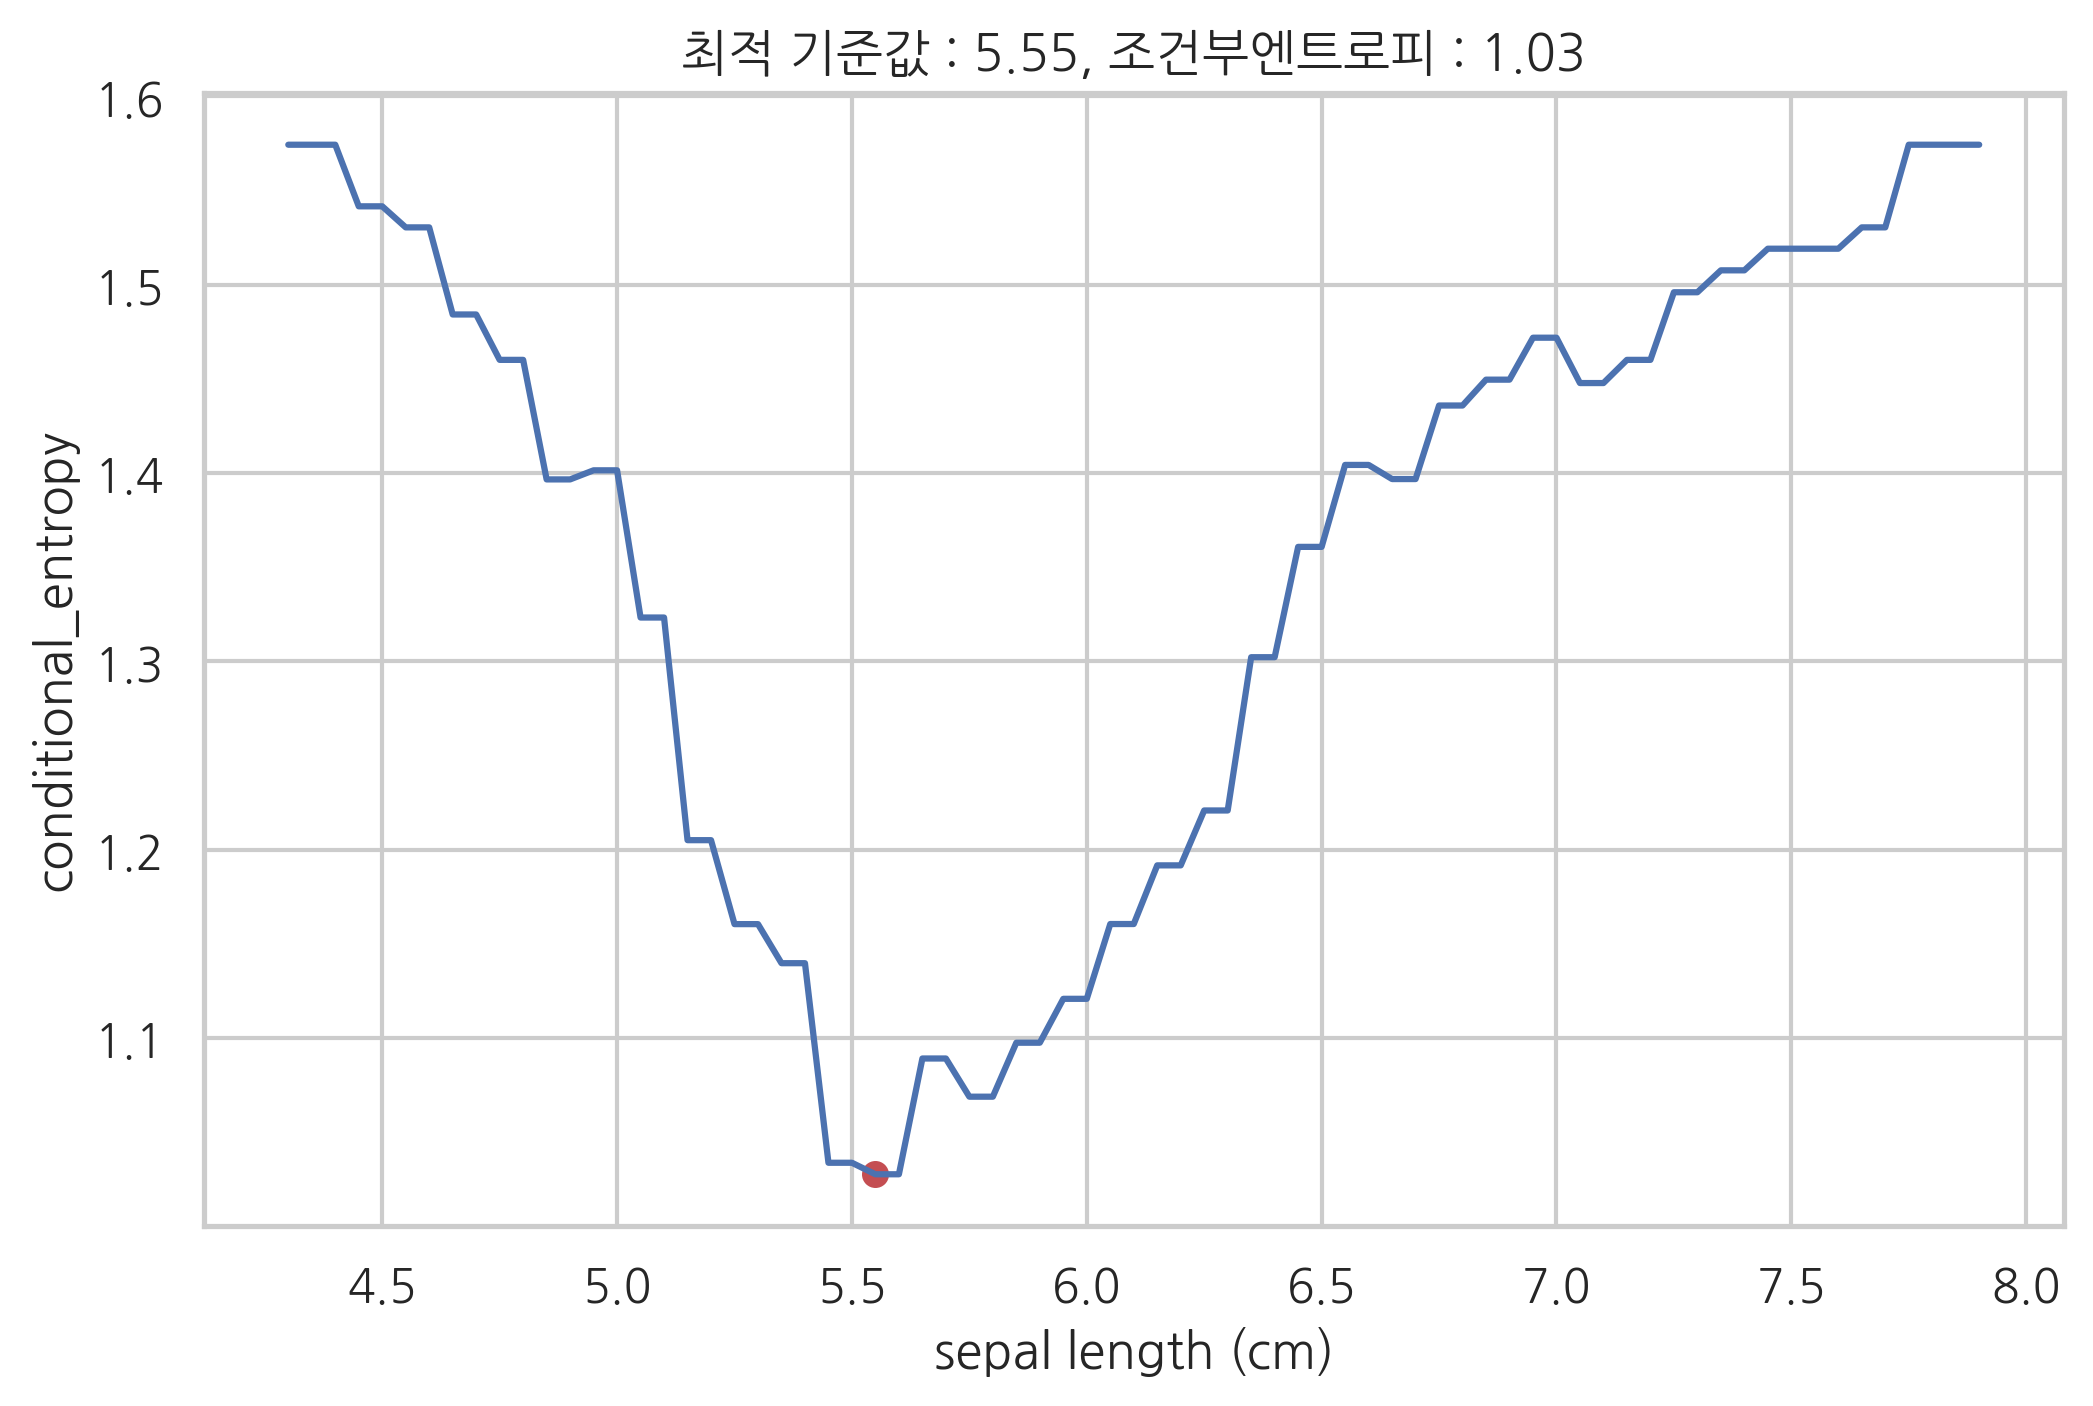

In [650]:
# 코드 정리해서 함수형태로 다시 짜기 
from sklearn.datasets import load_iris

def calc_cond_entropy(name) : 
    df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
    df['species'] = load_iris().target
    min_value = np.min(df[name].values)
    max_value = np.max(df[name].values)
    criteria_values = np.arange(min_value, max_value+0.05, step=0.05)
    
    cond_entropies = []
    for i, v in enumerate(criteria_values) : 
        variable = 'X'+str(i)
        df[variable] = df[name] > v
        combine_df = df.groupby([variable, 'species']).size().unstack().fillna(0).values
        
        pYX0 = combine_df[0,:]/np.sum(combine_df[0,:])
        pYX1 = combine_df[1,:]/np.sum(combine_df[1,:])
        eYX0 = sp.stats.entropy(pYX0, base=2)
        eYX1 = sp.stats.entropy(pYX1, base=2)
        marginal_x_sum = np.sum(combine_df, axis=1)
        cond_H = marginal_x_sum@np.array([eYX0, eYX1])/np.sum(combine_df)
        cond_entropies.append(cond_H)
    
    optimized_criteria = criteria_values[cond_entropies.index(np.min(cond_entropies))]
    minimized_entropy = np.min(cond_entropies)

    plt.plot(criteria_values, cond_entropies)
    plt.scatter(optimized_criteria, minimized_entropy, 30, 'r')
    plt.xlabel(f'{name}')
    plt.ylabel('conditional_entropy')
    plt.title('최적 기준값 : {}, 조건부엔트로피 : {}'.format(np.round(optimized_criteria,2), np.round(minimized_entropy,2)))
    plt.show()

calc_cond_entropy('sepal length (cm)')

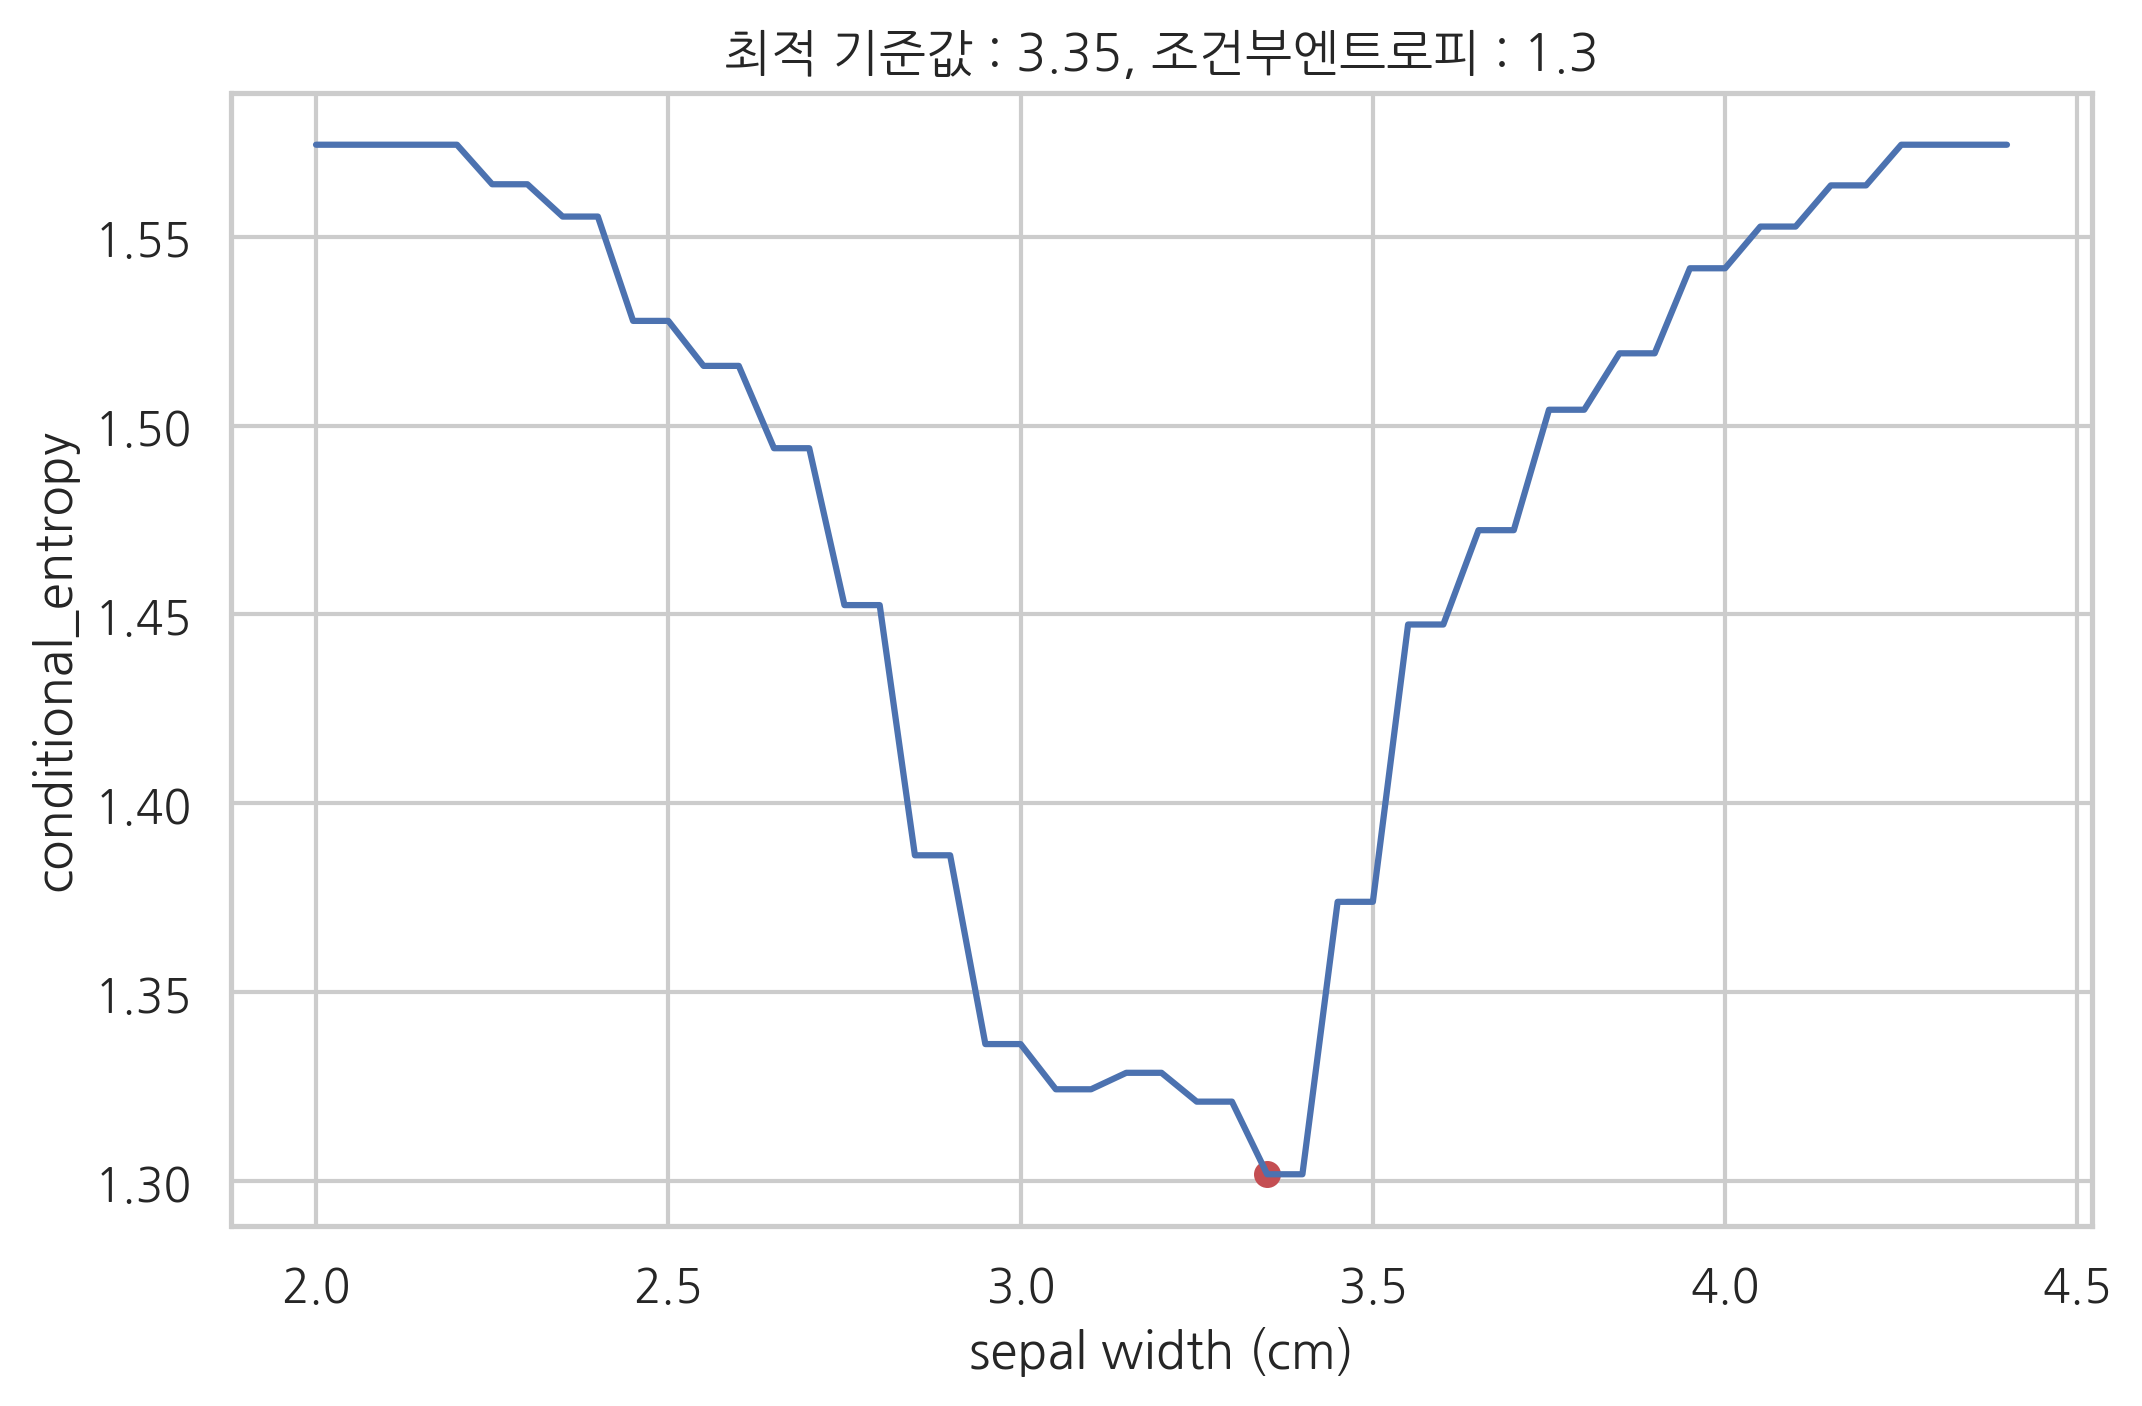

In [364]:
calc_cond_entropy('sepal width (cm)')

# 꽃받침 폭 보다 길이가 조건부엔트로피가 더 작으므로, 붓꽃 종 분류에 더 유용한 기준값이다.

# 교차엔트로피 

In [369]:
# 교차엔트로피 

p = [1/4]*4
q = [1/2, 1/4]+[1/8]*2

-(1/4)*np.log2(1/2)-(1/4)*np.log2(1/4)-(1/4)*np.log2(1/8)-(1/4)*np.log2(1/8)

2.25

In [460]:
from sklearn.datasets import load_iris

iris = load_iris()

idx = np.in1d(iris.target, [0,1])
data = iris.data[idx, :]
target = iris.target[idx]

df = pd.DataFrame(data, columns=iris.feature_names)
df['y'] = target
df['y_hat'] = (df['sepal length (cm)'] > 5.4).astype(int)

df2 = df[['sepal length (cm)', 'y', 'y_hat']]
df2

# 5.4를 기준으로 분류하는 분류모형의 평균 오차 크기 = 로그손실
from sklearn.metrics import log_loss
log_loss = log_loss(df['y'], df['y_hat'])
print(f'로그손실 : {log_loss}')

로그손실 : 3.799305383311686


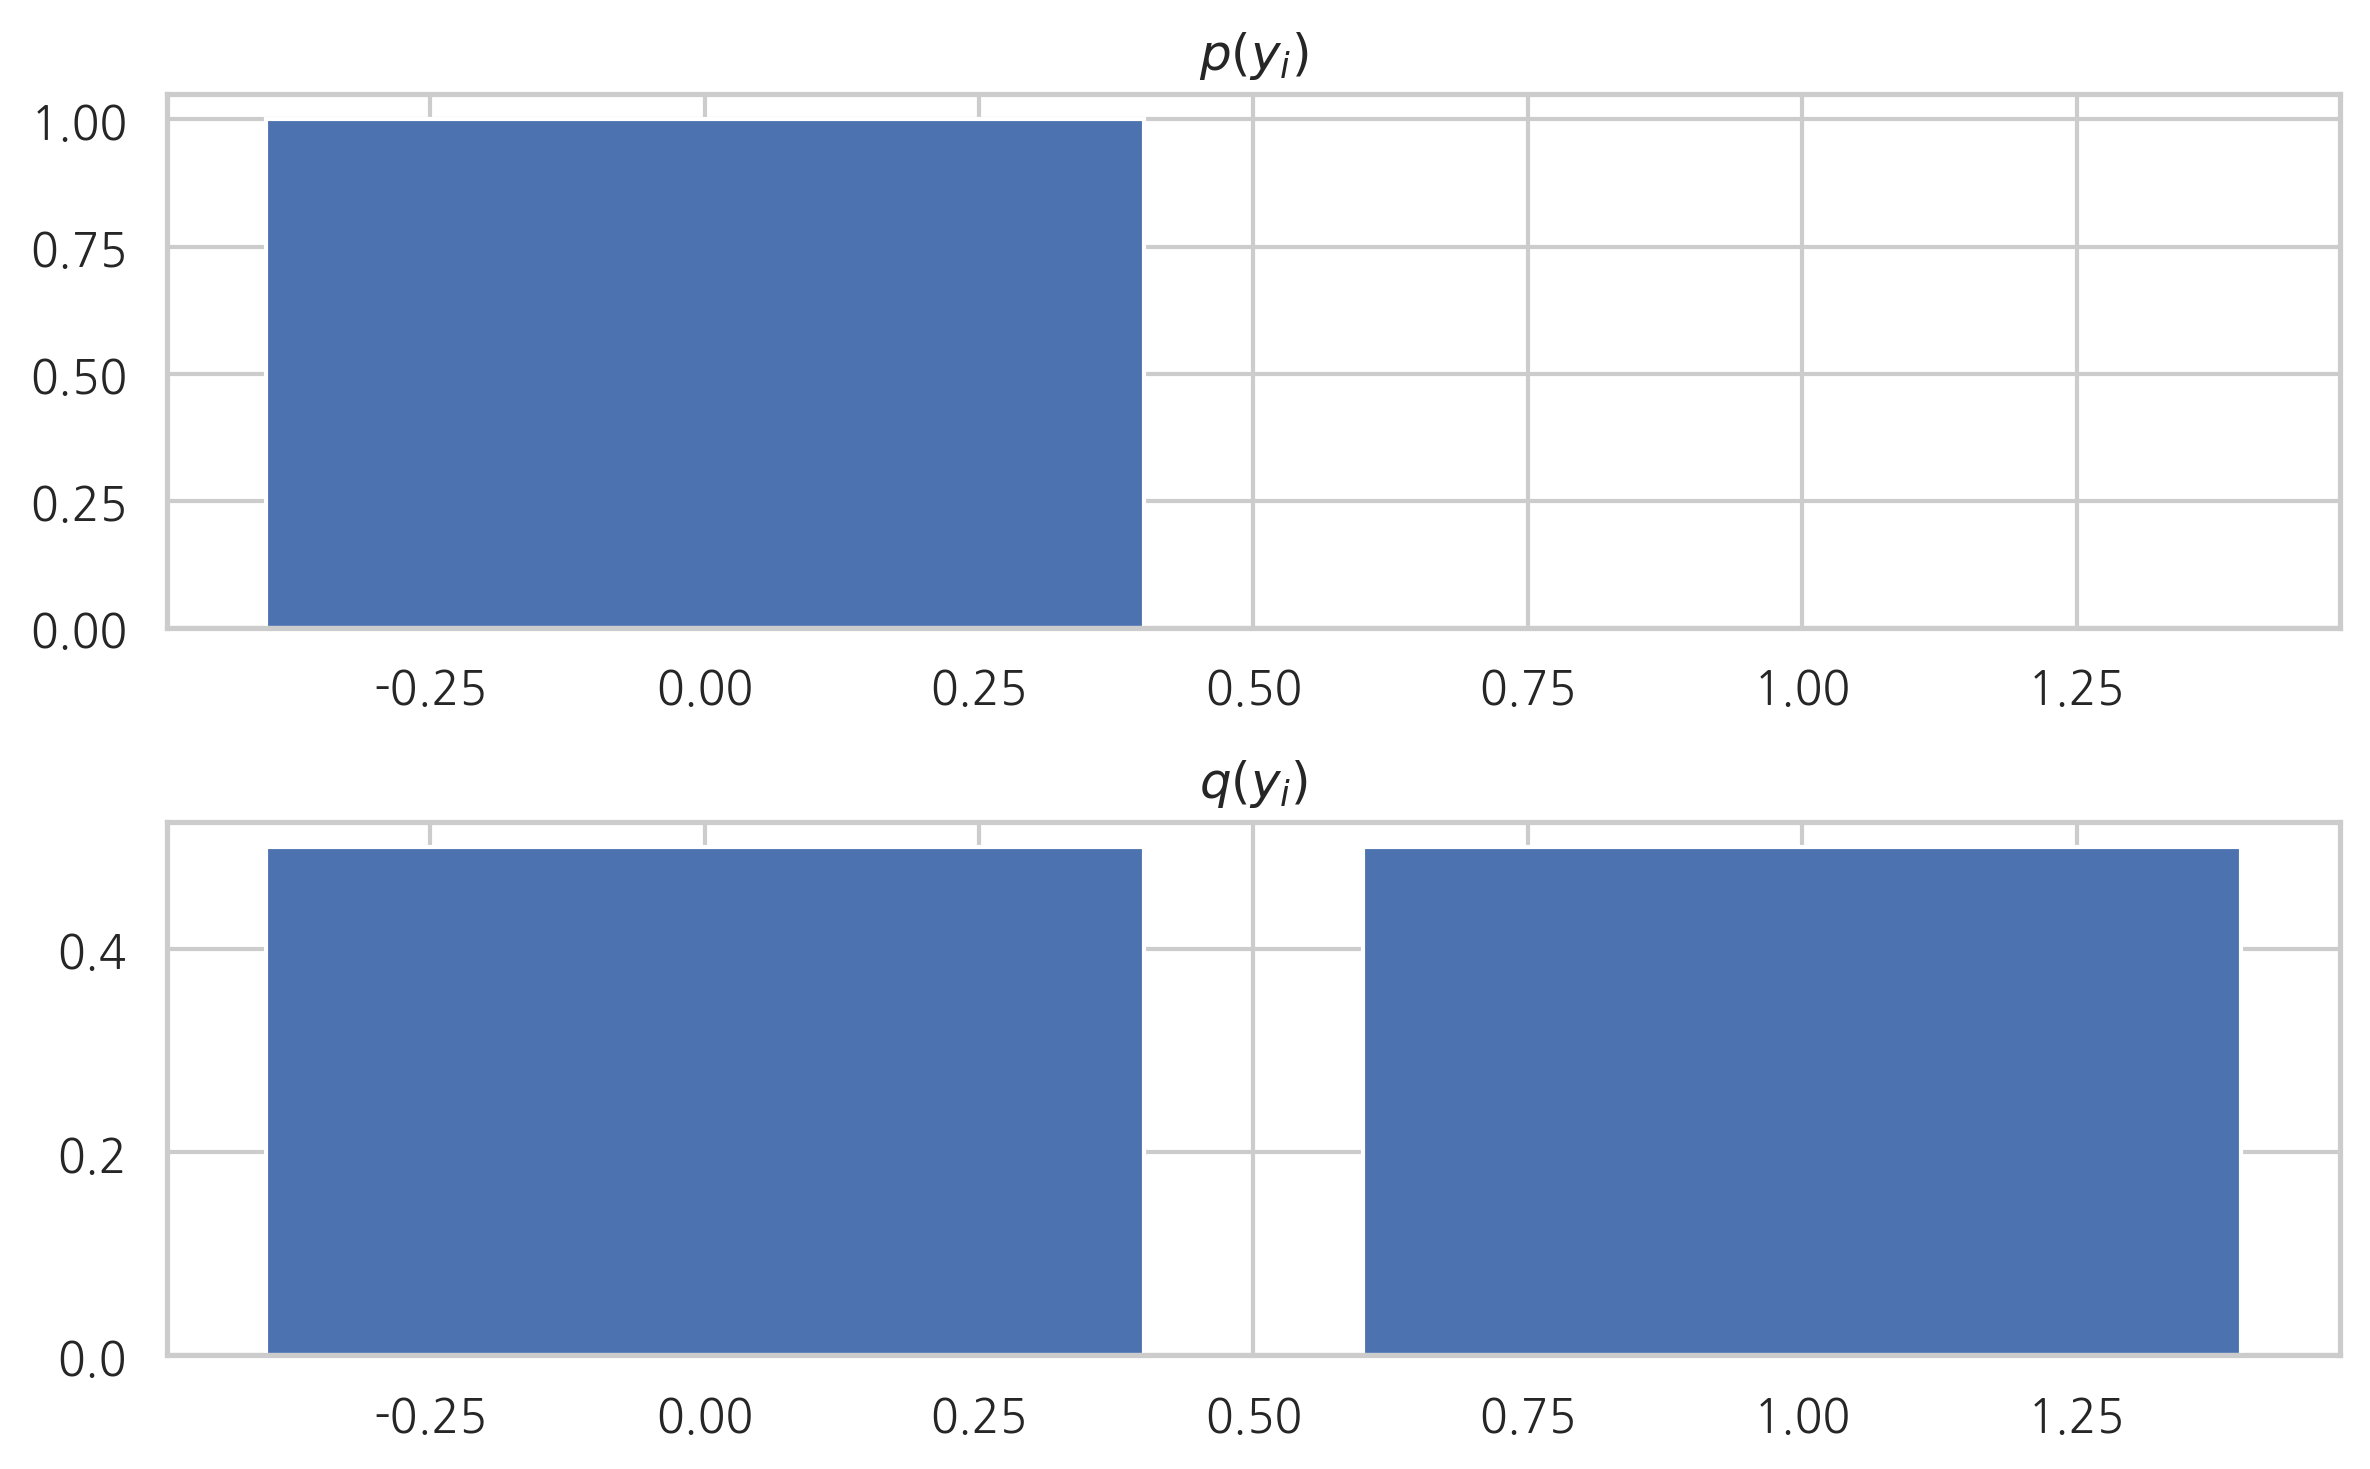

In [488]:
df2

plt.subplot(211)
plt.bar([0,1], [1,0])
plt.title('$p(y_{i})$')
plt.subplot(212)
plt.bar([0,1],[0.5,0.5])
plt.title('$q(y_{i})$')
plt.tight_layout()
plt.show()

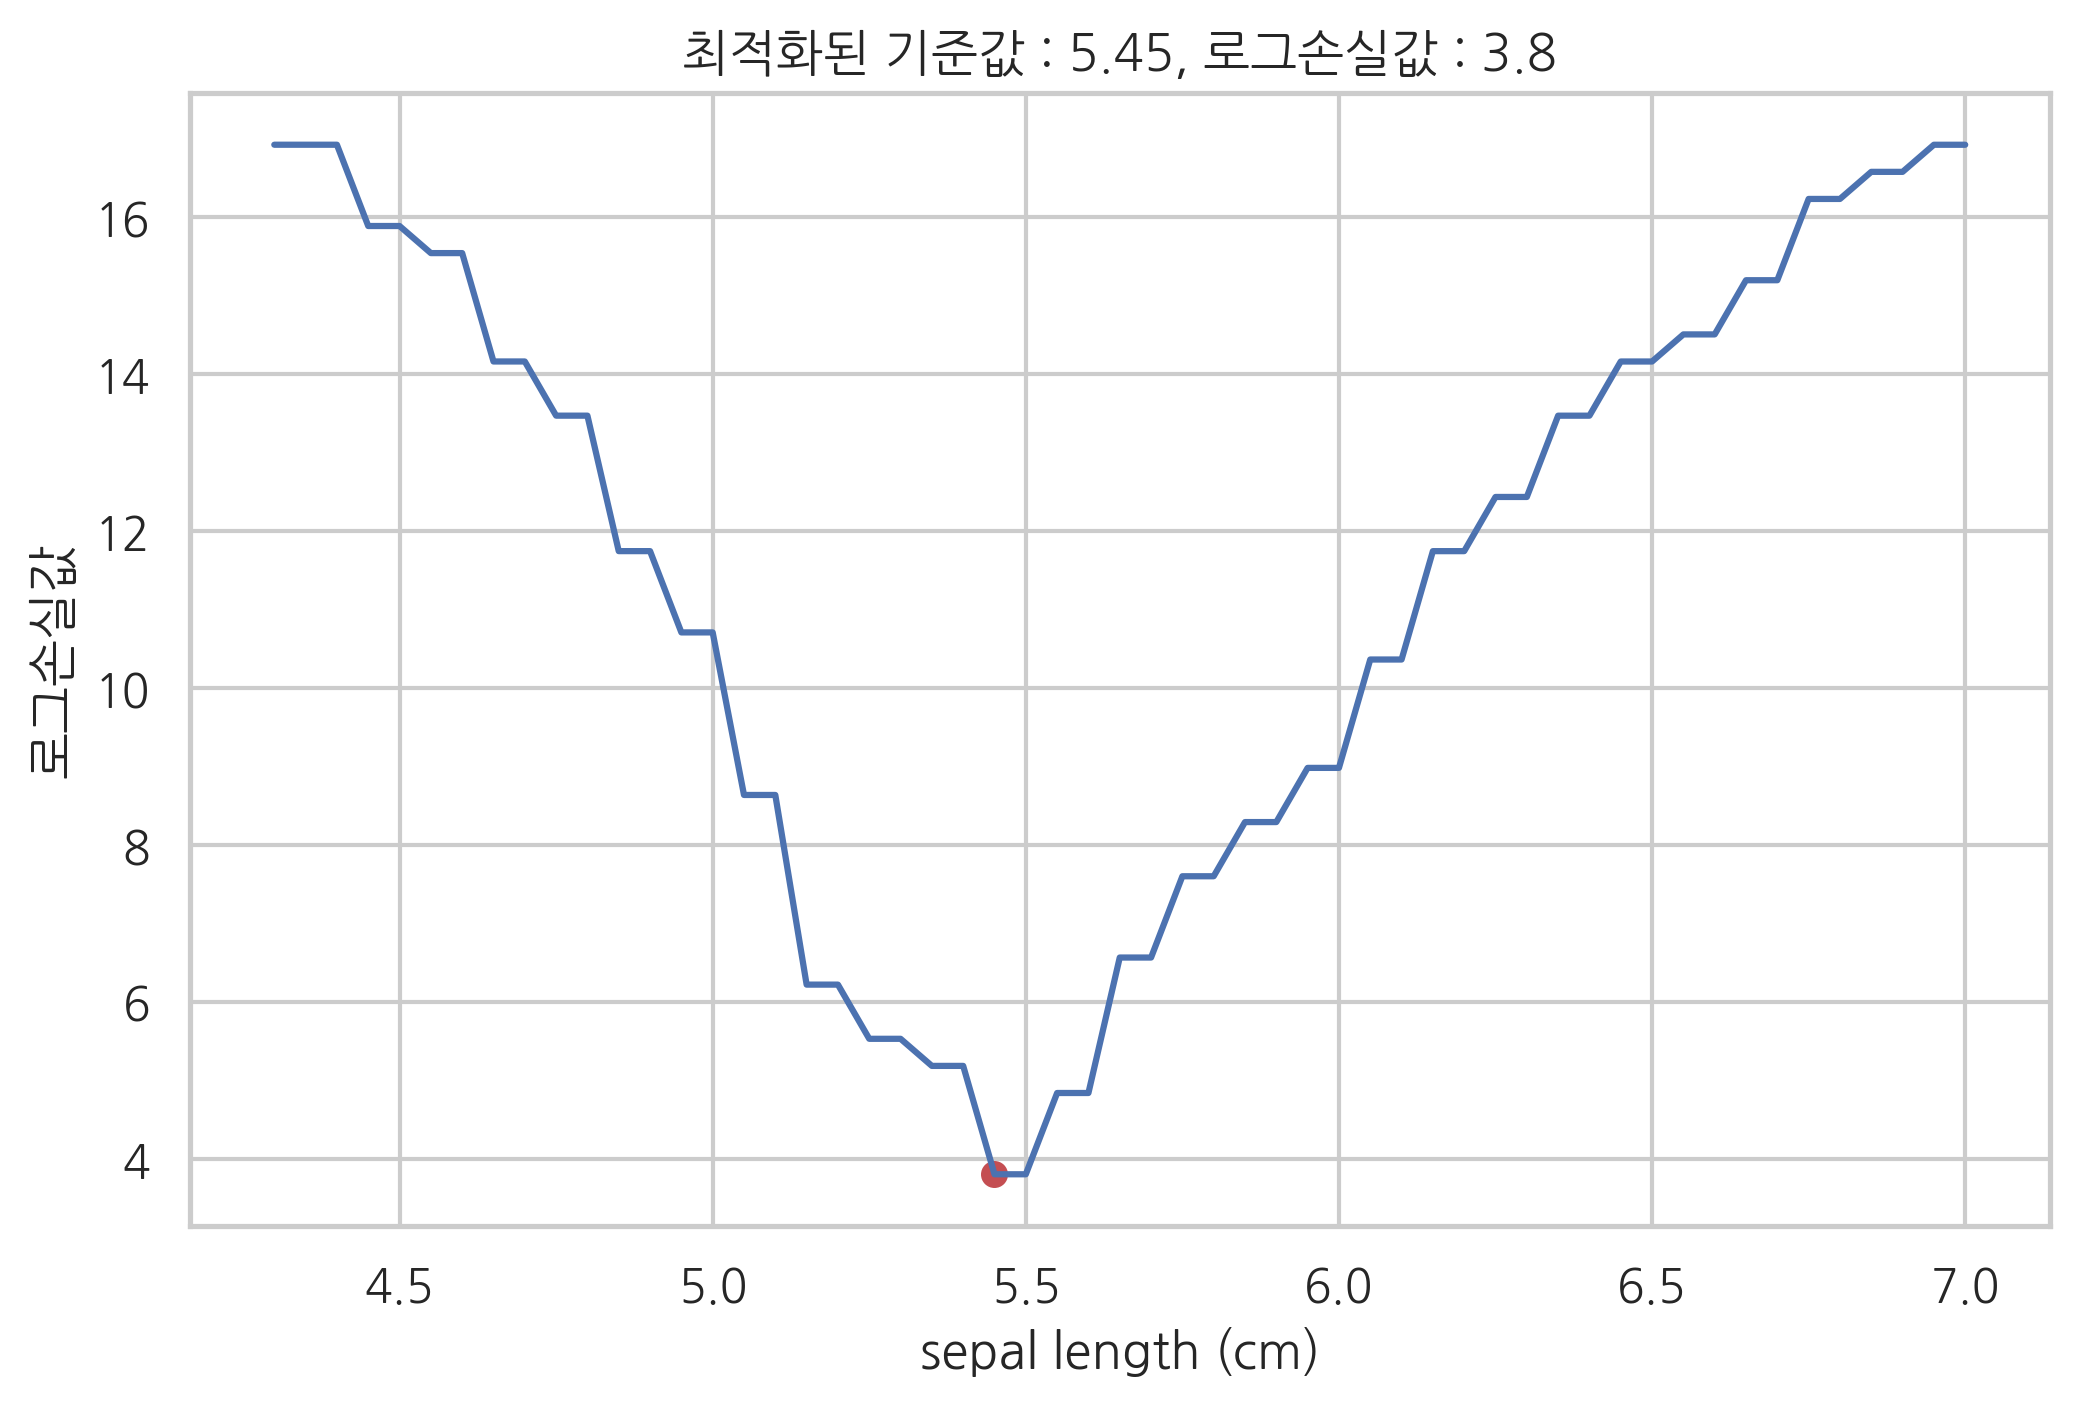

In [599]:
# 10.3.1 연습문제 
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss
iris = load_iris()

def ploting_log_loss(name, reverse=True) : 
    idx = np.in1d(iris.target, [0,1])
    x = iris.data[idx, :]
    y = iris.target[idx]
    df = pd.DataFrame(x, columns=iris.feature_names)
    df['y'] = y

    min_value = np.min(df[name].values)
    max_value = np.max(df[name].values)

    criteria_values = np.arange(min_value, max_value+0.05, step=0.05)
    log_loss_values = []
    for cv in criteria_values : 
        if reverse == False : 
            df['y_hat'] = (df[name] > cv).astype(int)
        else : 
            df['y_hat'] = (df[name] < cv).astype(int)
        log = log_loss(df['y'], df['y_hat'])
        log_loss_values.append(log)
    minimized_log_loss = np.min(log_loss_values)
    optimized_criteria_value = criteria_values[log_loss_values.index(minimized_log_loss)]

    plt.plot(criteria_values, log_loss_values)
    plt.title('최적화된 기준값 : %s, 로그손실값 : %s' %(np.round(optimized_criteria_value,2), np.round(minimized_log_loss,2)))
    plt.xlabel(name)
    plt.ylabel('로그손실값')
    plt.scatter(optimized_criteria_value, minimized_log_loss, 30, 'r')
    plt.show()

ploting_log_loss('sepal length (cm)', reverse=False)

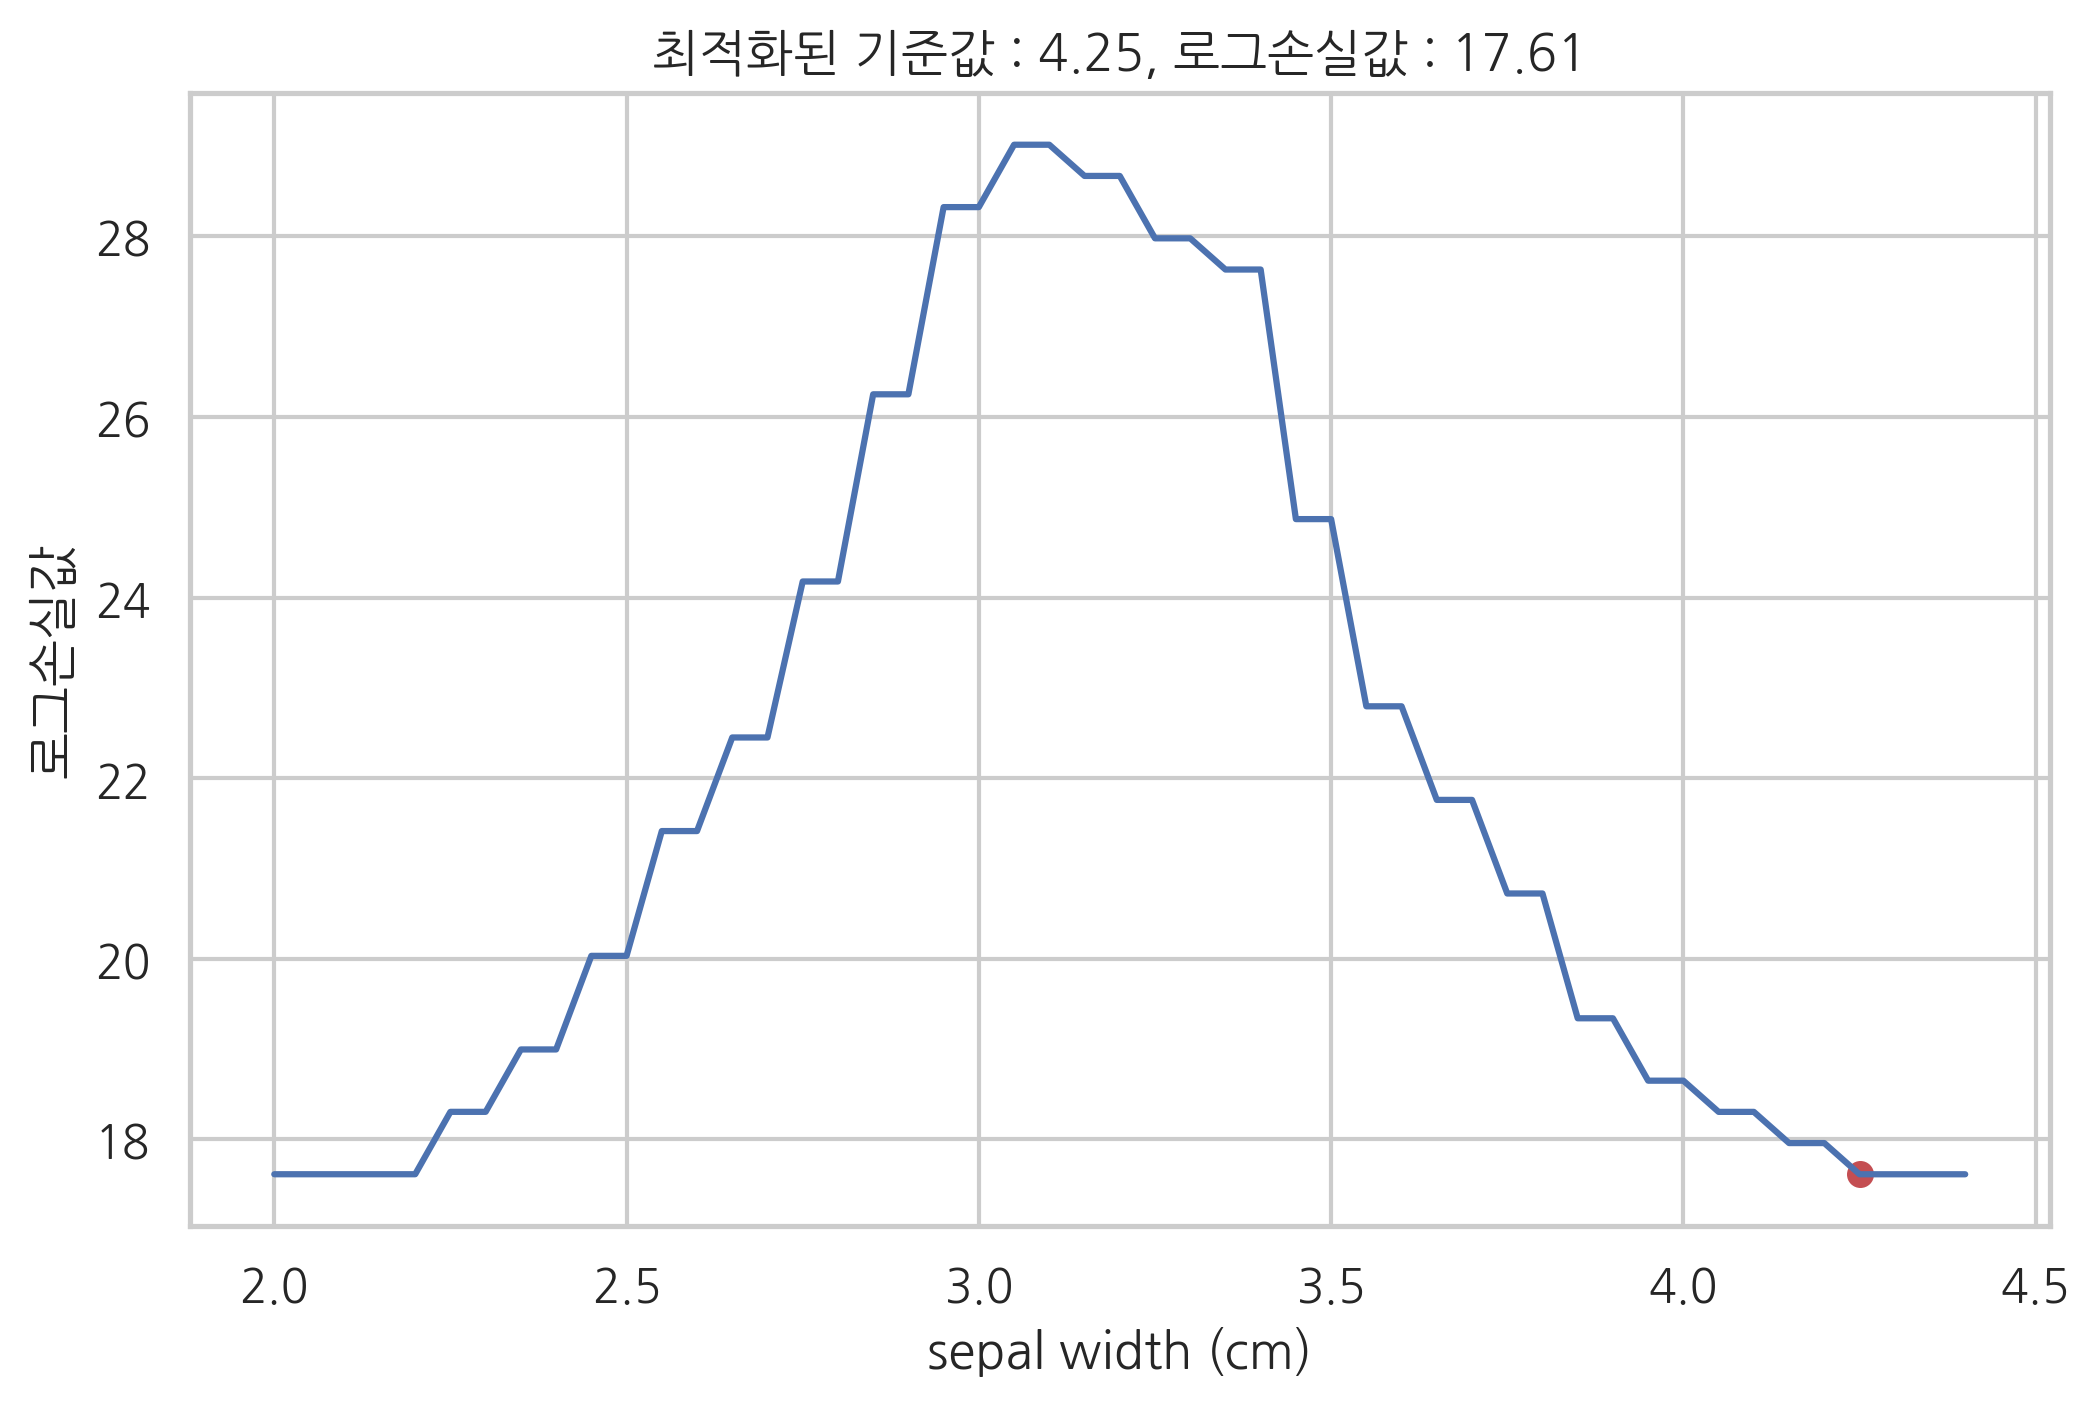

In [659]:
ploting_log_loss('sepal width (cm)', reverse=False)

# 위 그래프는 최소화 시켜야 하는데 최대화 된 경우다. 
# 이처럼 최적화 하다가 뜻대로 안 되면, 원본 데이터 특성을 다시 보자.

Text(0.5, 1.0, 'y 데이터 특성')

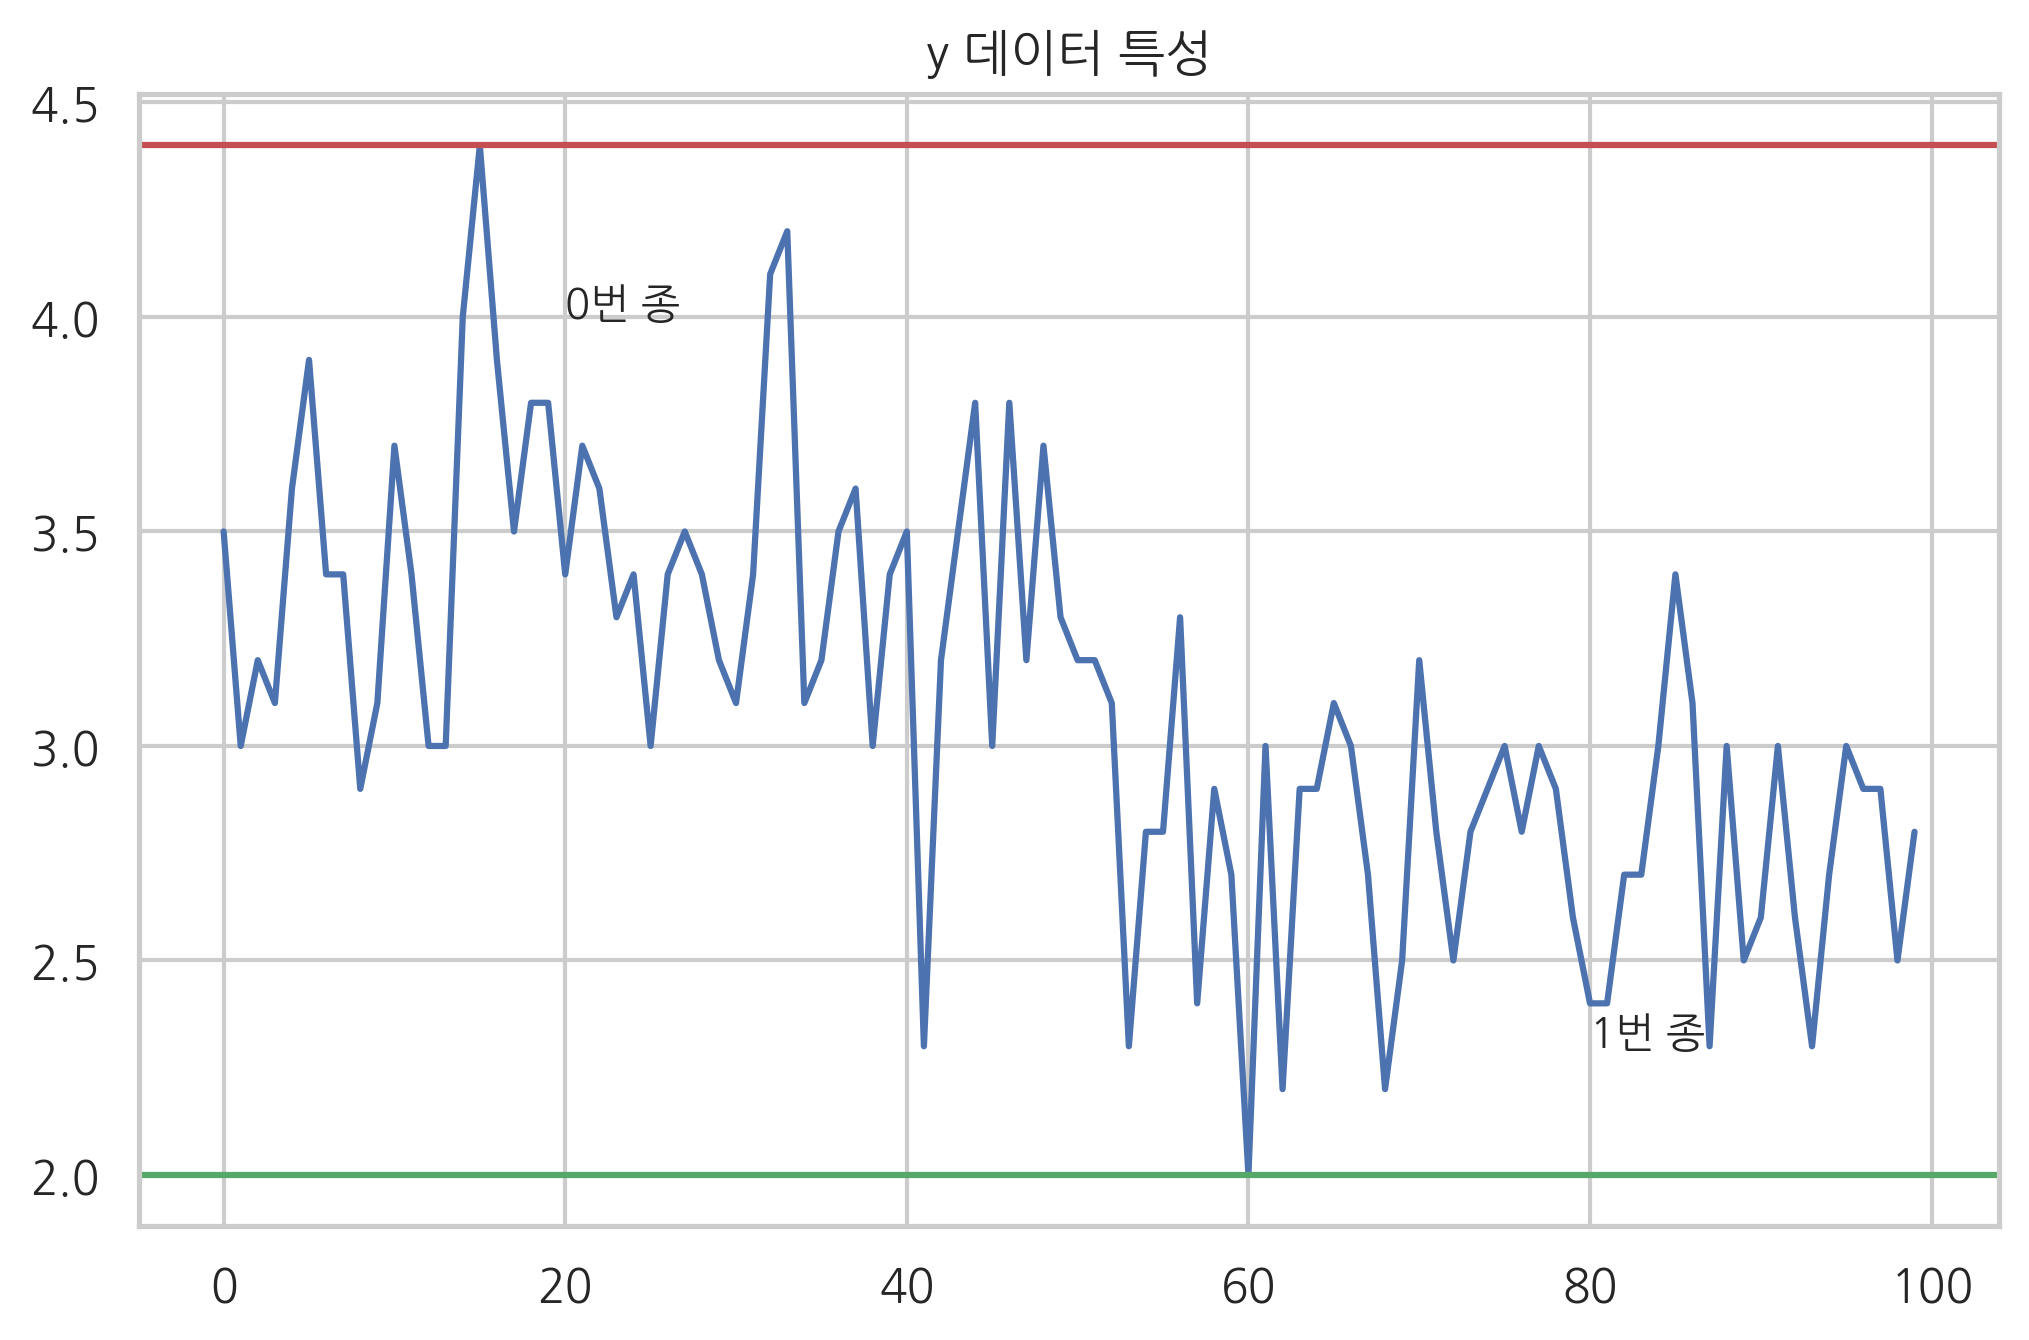

In [693]:
df['sepal width (cm)'].plot()
plt.axhline(np.max(df['sepal width (cm)'].values), c='r')
plt.axhline(np.min(df['sepal width (cm)'].values), c='g')
plt.text(20, 4.0, '0번 종')
plt.text(80, 2.3, '1번 종')
plt.title('y 데이터 특성')

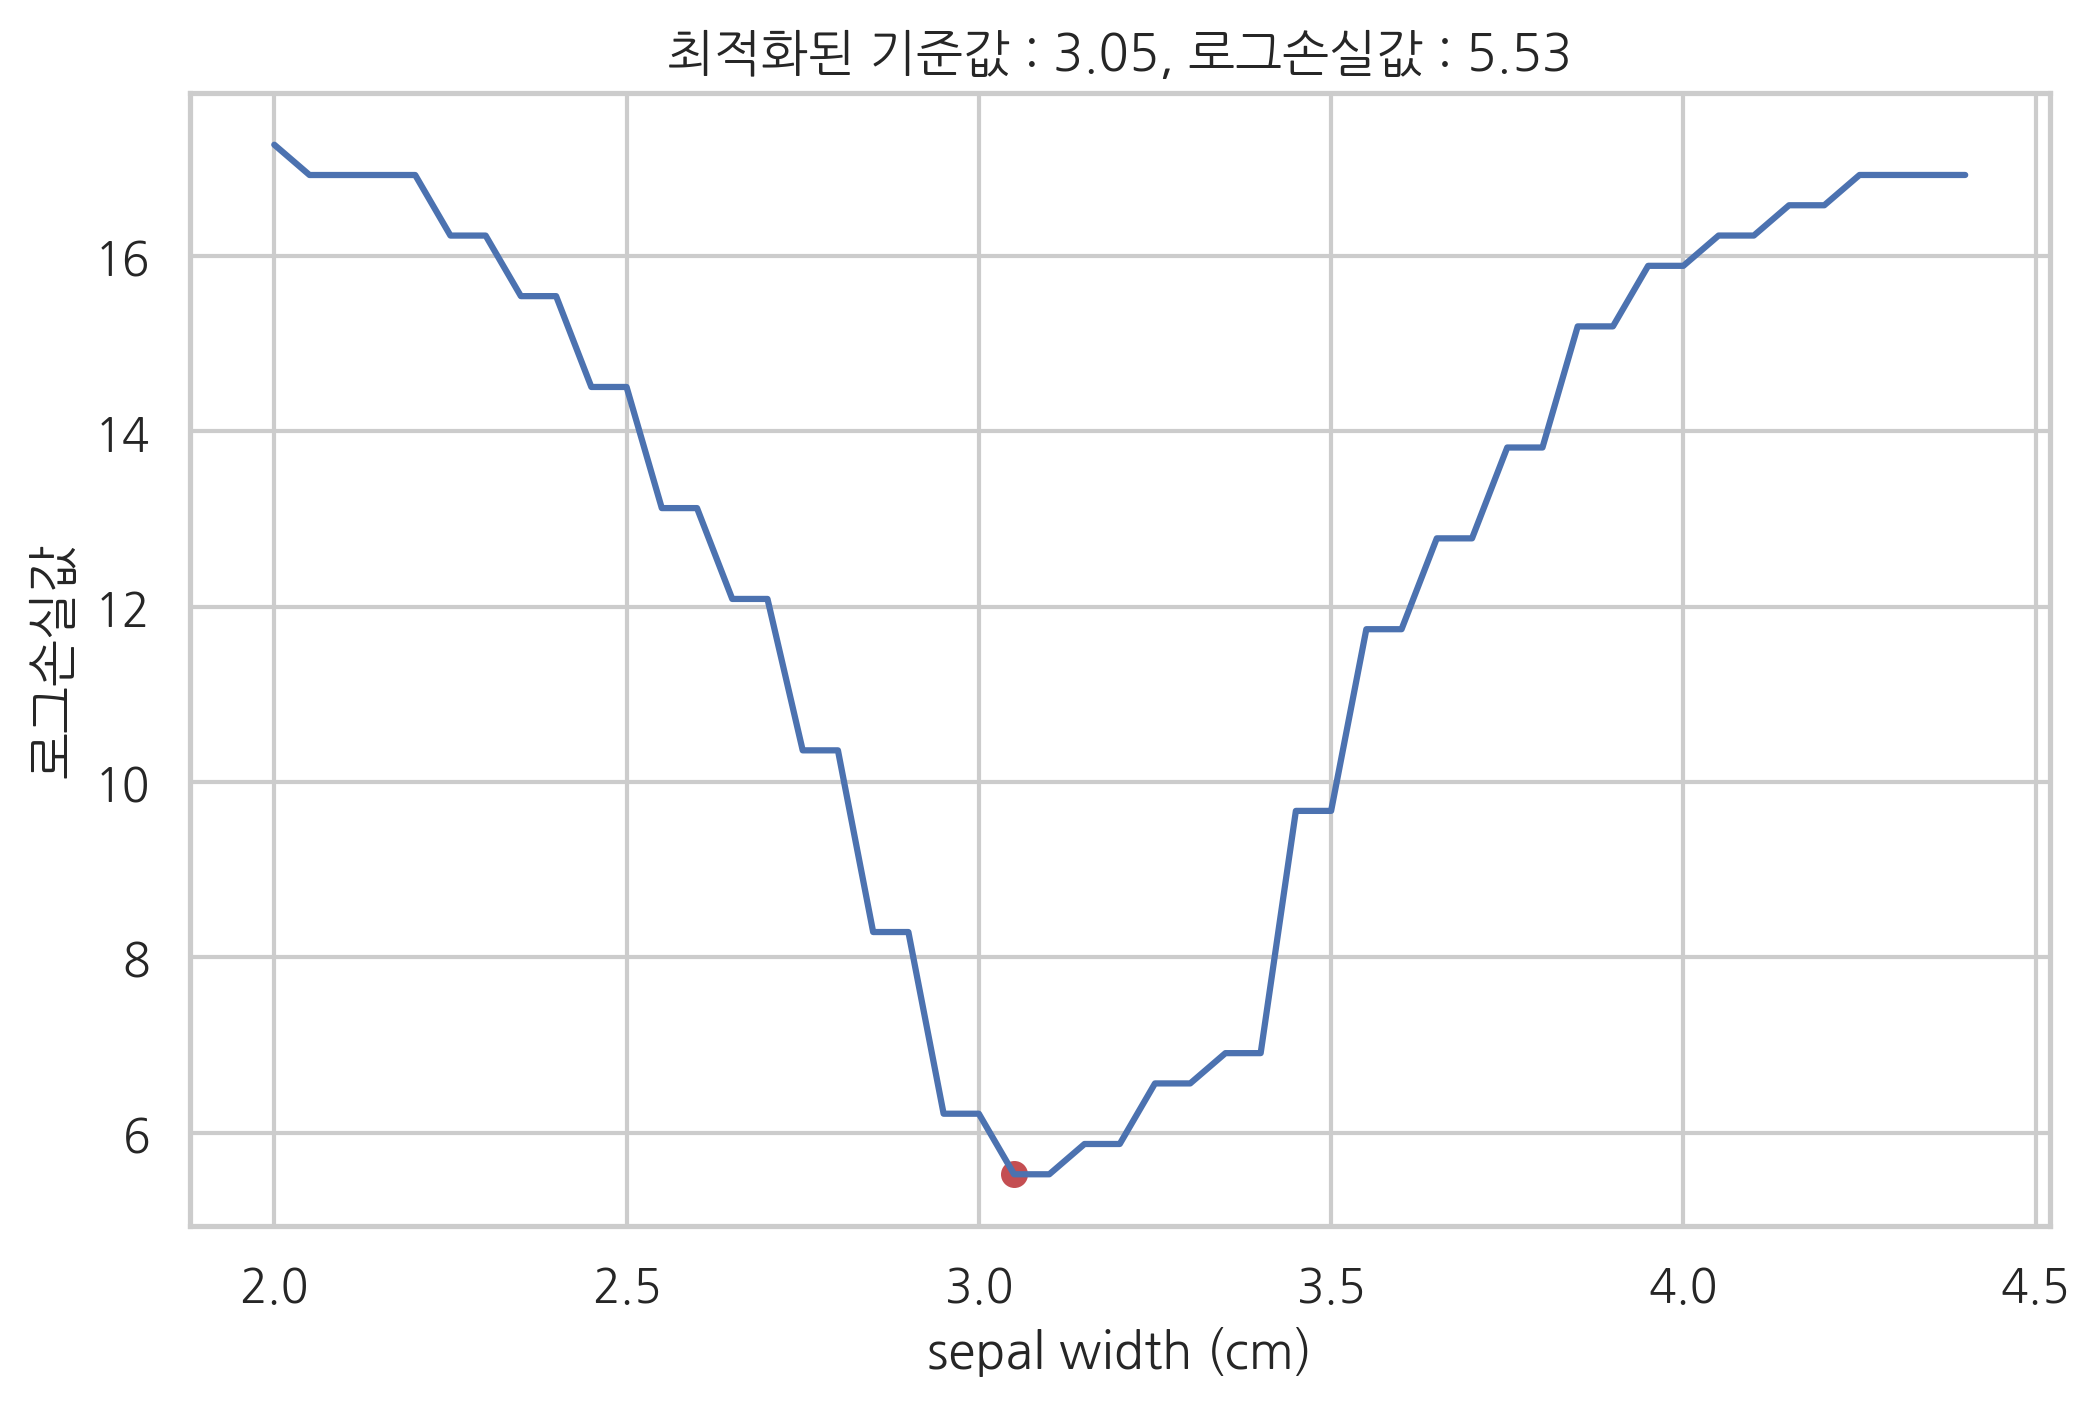

In [694]:
# 부등호 방향을 바꿔야 한다. 
ploting_log_loss('sepal width (cm)', reverse=True)

# 쿨백-라이블러 발산(상대엔트로피)

In [785]:
# 10.3.2 연습문제 
#1. 
p = [1/2, 1/4, 1/8, 1/16] + [1/64]*4
q = [1/8]*8

print(f'쿨백-라이블러발산값 : {sp.stats.entropy(p, q, base=2)}')
# or
# H[p] 
H_P = -((1/2)*np.log2(1/2)+(1/4)*np.log2(1/4)+(1/8)*np.log2(1/8)+(1/16)*np.log2(1/16)+(1/64)*np.log2(1/64)+(1/64)*np.log2(1/64)+(1/64)*np.log2(1/64)+(1/64)*np.log2(1/64))
# H[p, q]
H_P_Q = -((1/2)*np.log2(1/8)+(1/4)*np.log2(1/8)+(1/8)*np.log2(1/8)+(1/16)*np.log2(1/8)+(1/64)*np.log2(1/8)+(1/64)*np.log2(1/8)+(1/64)*np.log2(1/8)+(1/64)*np.log2(1/8))
result = H_P_Q-H_P
print(f'직접 계산해서 구한 상대엔트로피 : {result}')
print('-'*100)


쿨백-라이블러발산값 : 1.0
직접 계산해서 구한 상대엔트로피 : 1.0
----------------------------------------------------------------------------------------------------


# 상호정보량

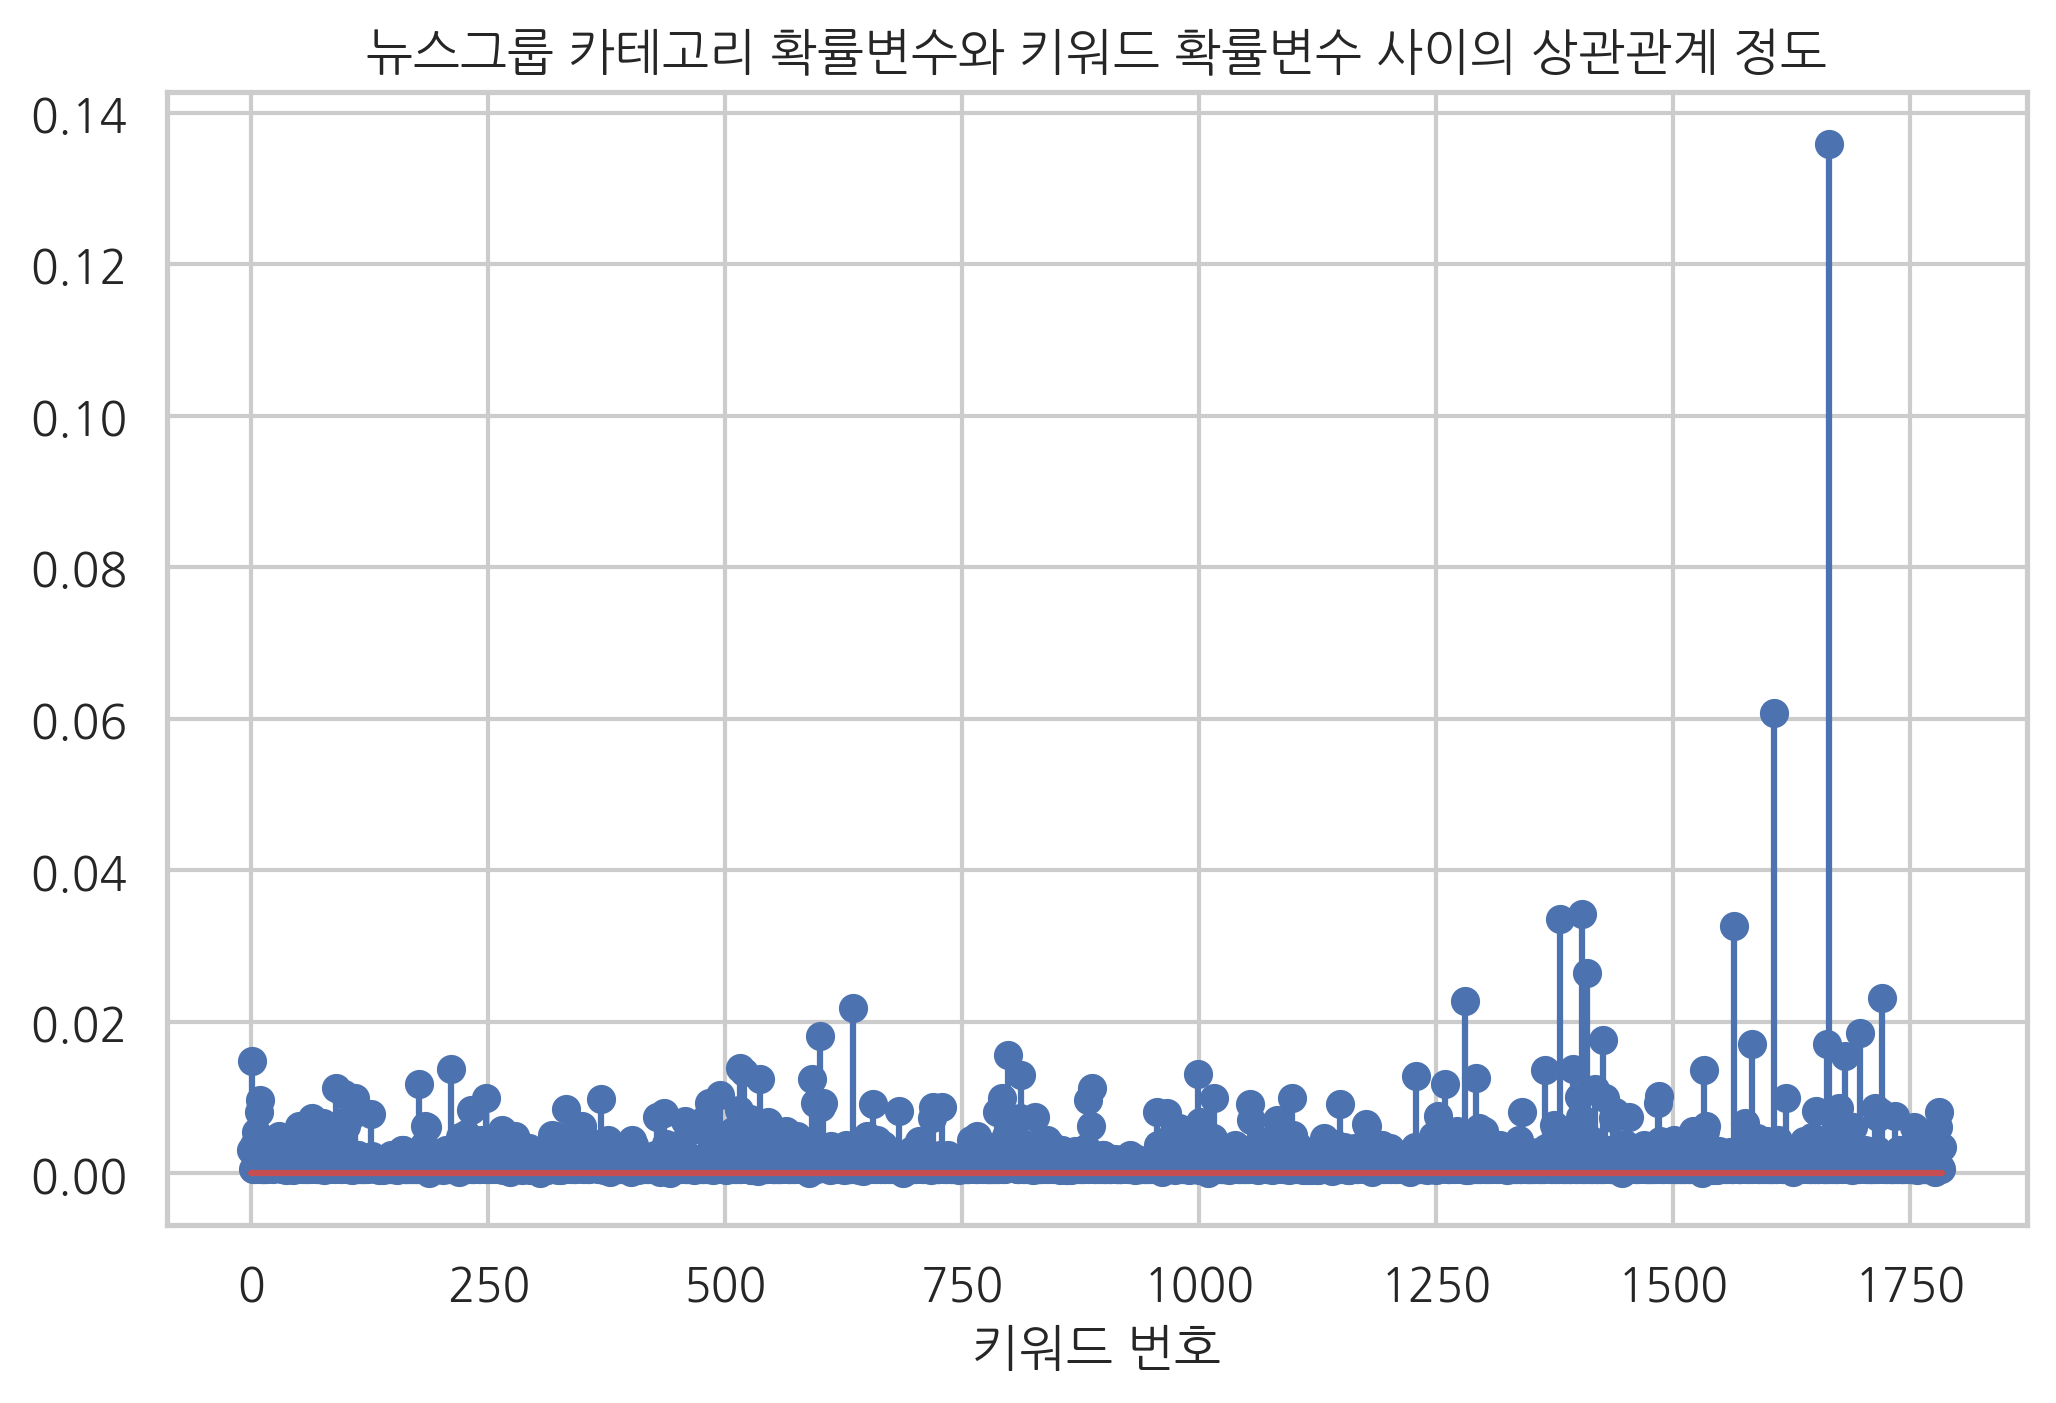

In [891]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words="english", token_pattern="[a-zA-Z]+")
X = vect.fit_transform(newsgroups.data).toarray() # 0번~ 2.3 만 번 키워드 확률변숫값 
y = newsgroups.target #뉴스그룹 카테고리 확률변숫값(0,1,2)
# 키워드 확률변숫값, 뉴스그룹 카테고리 확률변숫값 각각 1785개 
mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])]) 
plt.stem(mi)
plt.title("뉴스그룹 카테고리 확률변수와 키워드 확률변수 사이의 상관관계 정도")
plt.xlabel("키워드 번호")
plt.show()

In [903]:
inv_vocabulary = {v:k for k, v in vect.vocabulary_.items()} # 1~ 2.3만 번 까지의 키워드 
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

In [943]:
idx = np.flip(np.argsort(mi))
id_ = list(np.arange(1,10))

keywords = [inv_vocabulary[idx[i]] for i in np.arange(10)]
print('키워드 별 상호정보량 큰 순위')
print(list(zip(id_, keywords)))

키워드 별 상호정보량 큰 순위
[(1, 'baseball'), (2, 'banks'), (3, 'automotive'), (4, 'auto'), (5, 'ball'), (6, 'autos'), (7, 'batting'), (8, 'atlanta'), (9, 'alomar')]


# 최대정보 상관계수 MIC(maximal information coefficient)
- 두 연속확률변수 사이 상관관계 정도 나타낸다

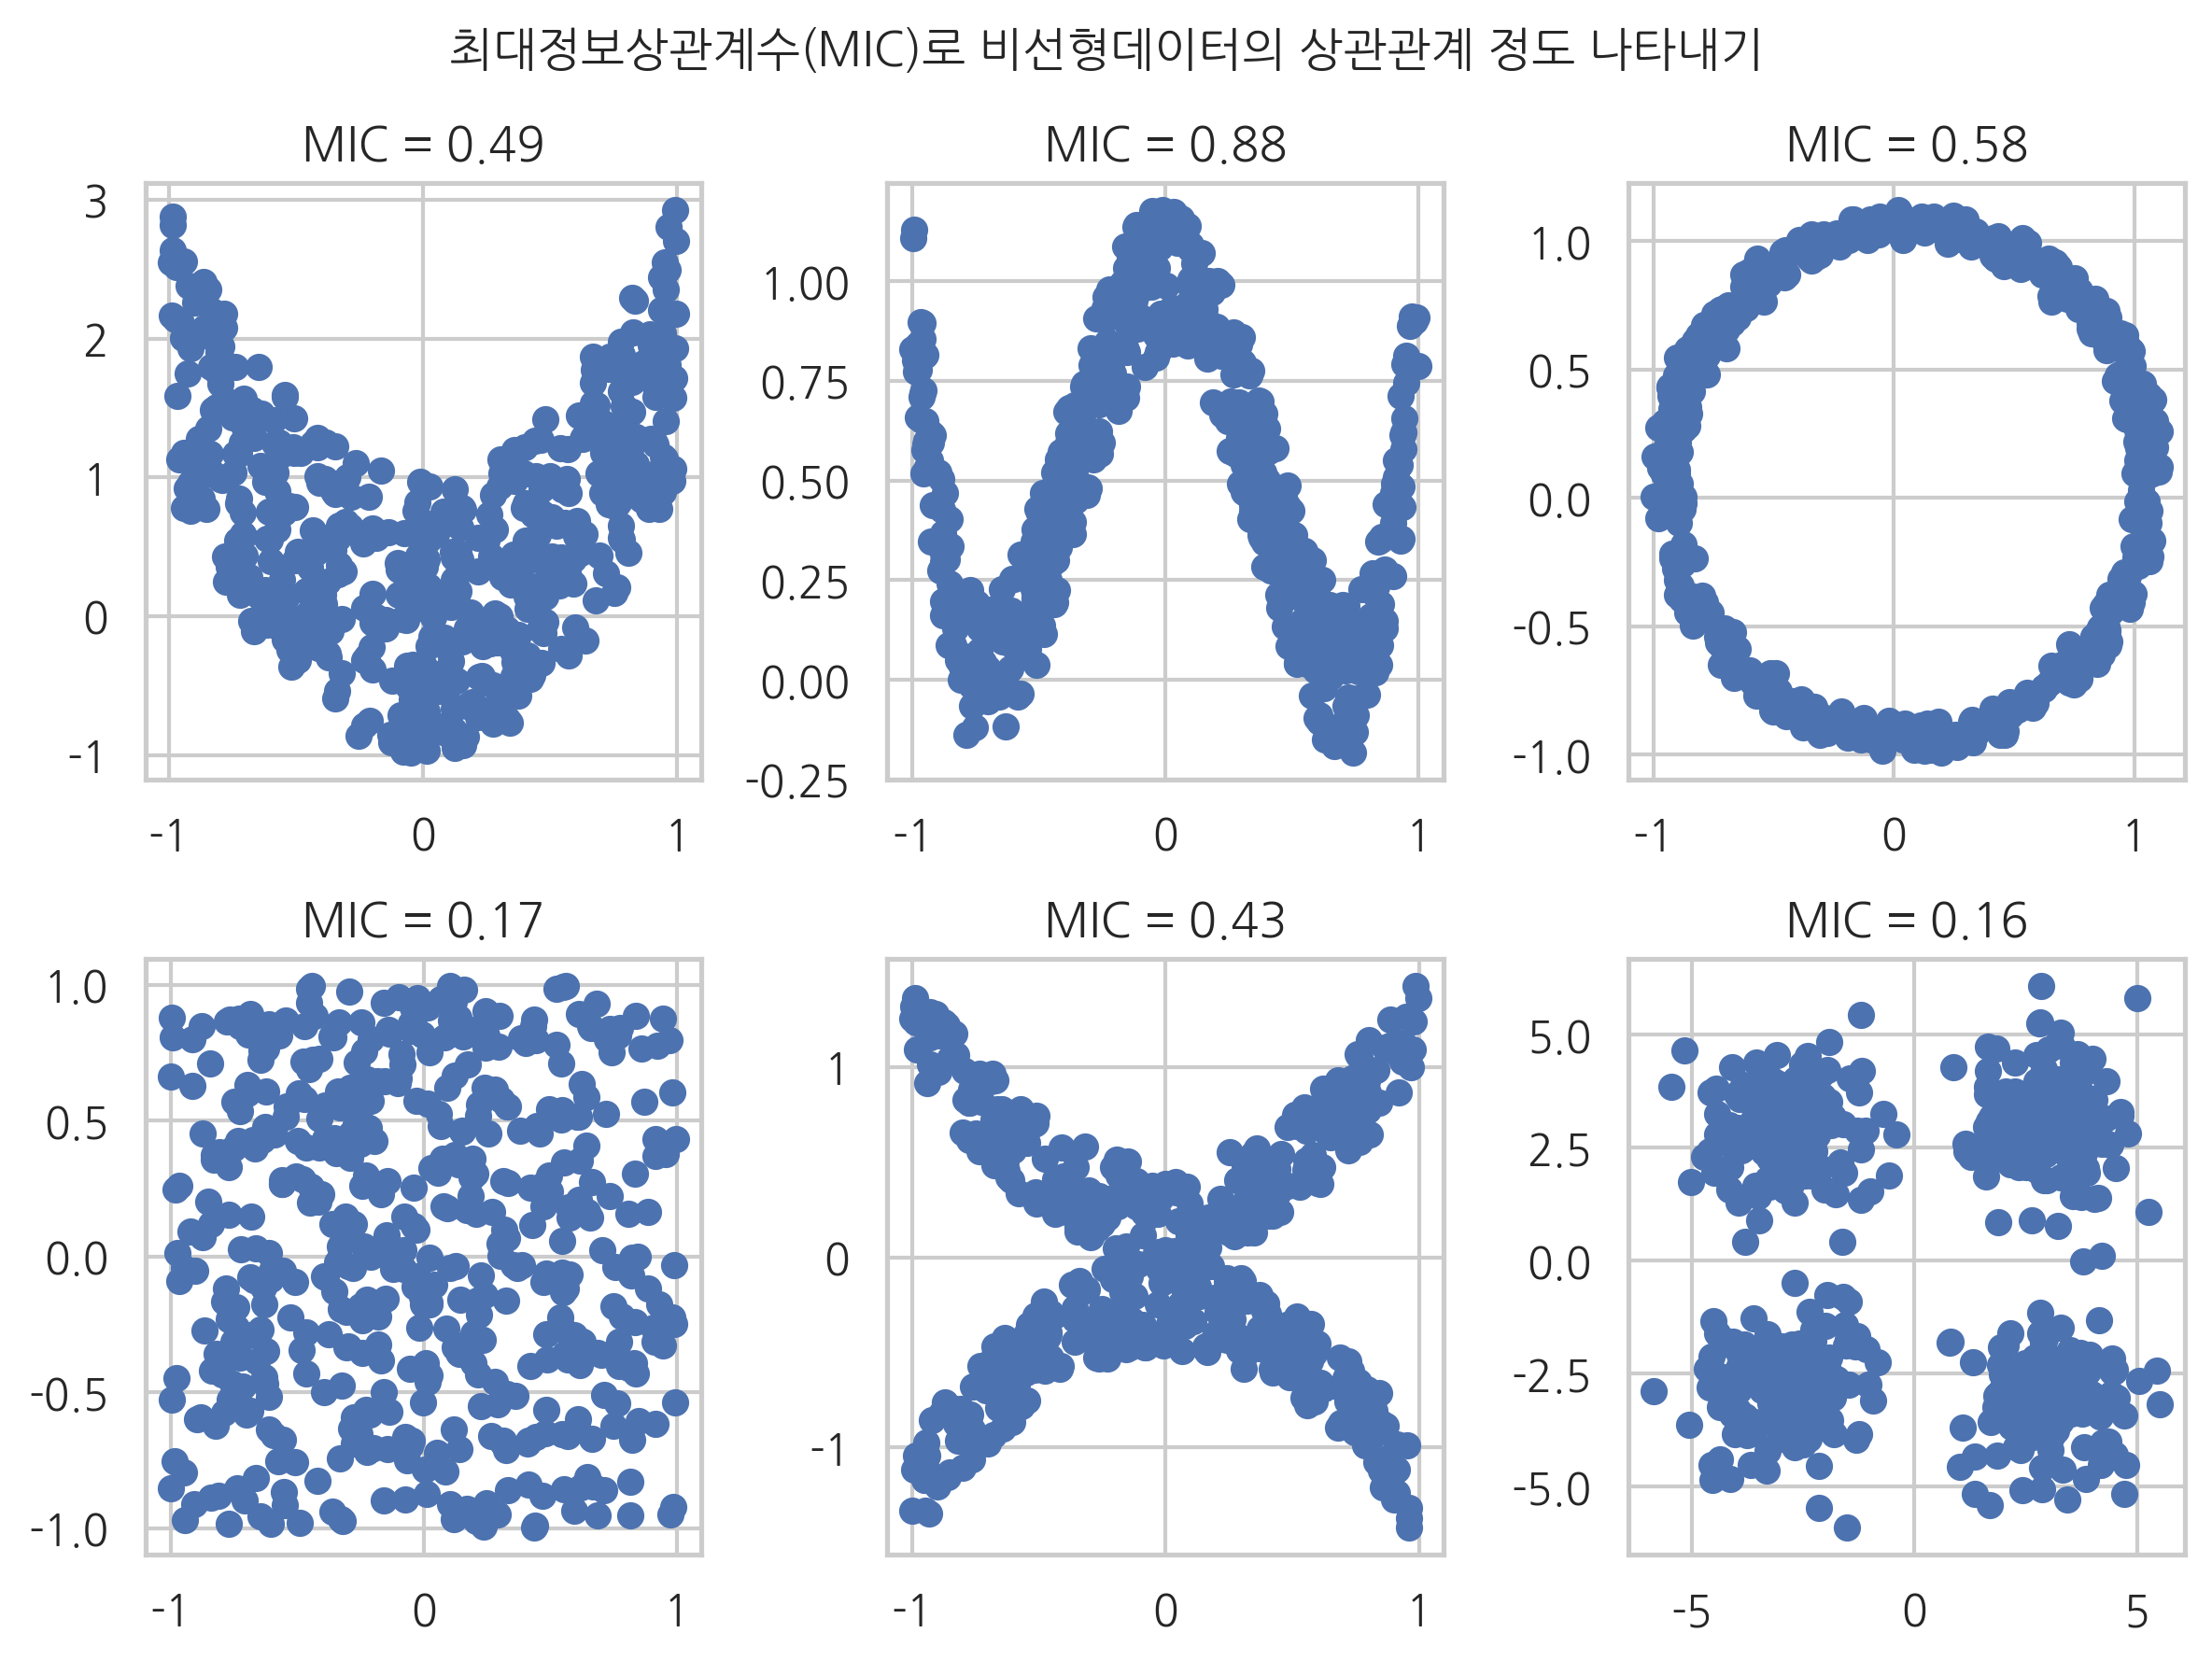

In [89]:
from minepy import MINE

mine = MINE()

n = 500

plt.figure(figsize=(8,6))

plt.subplot(231)
x1 = np.random.uniform(-1,1,n)
y1 = 2*x1**2+np.random.uniform(-1,1,n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title(f'MIC = {np.round(mine.mic(),2)}')

plt.subplot(232)
x2 = np.random.uniform(-1,1,n)
y2 = 4*(x2**2-0.5)**2+np.random.uniform(-1,1,n)/5
plt.scatter(x2, y2)
mine.compute_score(y2, x2)
plt.title(f'MIC = {np.round(mine.mic(),2)}')

plt.subplot(233)
x3 = np.random.uniform(-1,1,n)
y3 = np.cos(x3*np.pi)+np.random.uniform(0, 1/8, n)
x3 = np.sin(x3*np.pi)+np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title(f'MIC = {np.round(mine.mic(), 2)}')

plt.subplot(234)
x4 = np.random.uniform(-1,1,n)
y4 = np.random.uniform(-1,1,n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title(f'MIC = {np.round(mine.mic(), 2)}')

plt.subplot(235)
x5 = np.random.uniform(-1,1,n)
y5 = (x5**2+np.random.uniform(0, 0.5, n))*np.array([-1,1,])[np.random.random_integers(0,1, size=n)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title(f'MIC = {np.round(mine.mic(), 2)}')

plt.subplot(236)
xy1 = np.random.multivariate_normal([3,3],[[1,0],[0,1]], int(n/4))
xy2 = np.random.multivariate_normal([-3,3,],[[1,0],[0,1]], int(n/4))
xy3 = np.random.multivariate_normal([-3,-3,],[[1,0],[0,1]], int(n/4))
xy4 = np.random.multivariate_normal([3,-3],[[1,0],[0,1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:,0]
y6 = xy[:,1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title(f'MIC = {np.round(mine.mic(), 2)}')

plt.suptitle(f'최대정보상관계수(MIC)로 비선형데이터의 상관관계 정도 나타내기')
plt.tight_layout()
plt.show()